# Download the PyDrive to import data from google drive

In [ ]:
!pip install -U -q PyDrive
!python -m pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.2/358.2 kB 5.8 MB/s eta 0:00:00


# Import packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import matplotlib.patches as mpatches

# Read data

In [ ]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
file_id = '1_Guqvz4hEUttoJ6M9_2ylqeeDaw3ANg4'
download = drive.CreateFile({'id': file_id})

In [ ]:
# Download the file to a local disc
download.GetContentFile('20230321 UCI Capstone.csv')

In [ ]:
df  = pd.read_csv('20230321 UCI Capstone.csv')
df.head()

,USERID,RUN_DATE,TOOL_CLASS,TOOL_NAME,UNIQUE_HOURS_RUN,TOOL_COUNT,TOTAL_RUNS
0,40924be34779db43793960c131baa2c49144f2adba22a6...,2022-01-07,Documentation,Comment,1,15,3
1,40924be34779db43793960c131baa2c49144f2adba22a6...,2022-01-07,In/Out,Browse,1,6,3
2,40924be34779db43793960c131baa2c49144f2adba22a6...,2022-01-07,In/Out,Input Data,1,6,3
3,40924be34779db43793960c131baa2c49144f2adba22a6...,2022-01-07,Preparation,Auto Field,1,3,3
4,40924be34779db43793960c131baa2c49144f2adba22a6...,2022-01-07,Preparation,Filter,1,3,3


In [ ]:
df['RUN_DATE'] = pd.to_datetime(df['RUN_DATE'], format = "%Y-%m-%d")

In [ ]:
df['TOOL_NAME'].nunique()

244

In [ ]:
df

,USERID,RUN_DATE,TOOL_CLASS,TOOL_NAME,UNIQUE_HOURS_RUN,TOOL_COUNT,TOTAL_RUNS
0,40924be34779db43793960c131baa2c49144f2adba22a6...,2022-01-07,Documentation,Comment,1,15,3
1,40924be34779db43793960c131baa2c49144f2adba22a6...,2022-01-07,In/Out,Browse,1,6,3
2,40924be34779db43793960c131baa2c49144f2adba22a6...,2022-01-07,In/Out,Input Data,1,6,3
3,40924be34779db43793960c131baa2c49144f2adba22a6...,2022-01-07,Preparation,Auto Field,1,3,3
4,40924be34779db43793960c131baa2c49144f2adba22a6...,2022-01-07,Preparation,Filter,1,3,3
...,...,...,...,...,...,...,...
568353,2a42b9e17241b8eb8735696ed97dcab4beb8ba6fd3a306...,2022-08-23,Preparation,Formula,1,40,1
568354,2a42b9e17241b8eb8735696ed97dcab4beb8ba6fd3a306...,2022-08-23,Preparation,Select,1,42,1
568355,2a42b9e17241b8eb8735696ed97dcab4beb8ba6fd3a306...,2022-08-23,Preparation,Unique,1,1,1
568356,2a42b9e17241b8eb8735696ed97dcab4beb8ba6fd3a306...,2022-08-23,Transform,Summarize,1,8,1


# Exploratory data analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print("Number of users:", df['USERID'].nunique())

Number of users: 856


In [ ]:
print("Min time:", df['RUN_DATE'].min())
print("Max time:", df['RUN_DATE'].max())

Min time: 2022-01-01 00:00:00
Max time: 2023-02-28 00:00:00


Have at most one year data

In [ ]:
df.describe()

,UNIQUE_HOURS_RUN,TOOL_COUNT,TOTAL_RUNS
count,568358.000000,568358.000000,568358.000000
mean,2.388294,48.890214,12.705168
std,2.078339,251.038844,39.183639
min,1.000000,1.000000,1.000000
25%,1.000000,3.000000,2.000000
50%,2.000000,8.000000,4.000000
75%,3.000000,29.000000,13.000000
max,24.000000,26409.000000,8308.000000


In [ ]:
# Ordered by UNIQUE_HOURS_RUN
unique_hour_df = df.sort_values(by = 'UNIQUE_HOURS_RUN', ascending = False).head(5)
unique_hour_df

,USERID,RUN_DATE,TOOL_CLASS,TOOL_NAME,UNIQUE_HOURS_RUN,TOOL_COUNT,TOTAL_RUNS
140056,ae0e656bce571c3f03b93c8097a16ebea9e058e81a5e73...,2022-04-05,Preparation,Formula,24,1839,1824
140049,ae0e656bce571c3f03b93c8097a16ebea9e058e81a5e73...,2022-04-05,In/Out,Text Input,24,1829,1829
140045,ae0e656bce571c3f03b93c8097a16ebea9e058e81a5e73...,2022-04-05,Documentation,Comment,24,1814,1813
140046,ae0e656bce571c3f03b93c8097a16ebea9e058e81a5e73...,2022-04-05,In/Out,Browse,24,1845,1826
140048,ae0e656bce571c3f03b93c8097a16ebea9e058e81a5e73...,2022-04-05,In/Out,Output Data,24,1816,1816


In [ ]:
# Ordered by TOOL_COUNT
tool_count_df = df.sort_values(by = 'TOOL_COUNT', ascending = False).head(5)
tool_count_df

,USERID,RUN_DATE,TOOL_CLASS,TOOL_NAME,UNIQUE_HOURS_RUN,TOOL_COUNT,TOTAL_RUNS
338763,bab646f7454bc292e1aa06729c64de8ba1a18edeeed888...,2022-07-13,Preparation,Select,12,26409,157
338753,bab646f7454bc292e1aa06729c64de8ba1a18edeeed888...,2022-07-13,Join,Join,12,21649,137
142637,ae0e656bce571c3f03b93c8097a16ebea9e058e81a5e73...,2022-12-15,In/Out,Text Input,18,21604,8308
338801,bab646f7454bc292e1aa06729c64de8ba1a18edeeed888...,2022-07-14,Preparation,Select,14,18680,106
338759,bab646f7454bc292e1aa06729c64de8ba1a18edeeed888...,2022-07-13,Preparation,Formula,12,18184,157


In [ ]:
n = df['TOOL_CLASS'].nunique()
print(f'{n} tool classes:', df['TOOL_CLASS'].unique())

25 tool classes: ['Documentation' 'In/Out' 'Preparation' 'Join' 'Parse' 'Transform'
 'Developer' 'Interface' 'Reporting' 'Predictive' 'In-Database'
 'Data Investigation' 'Spatial' 'Address' 'NLP' 'Time Series'
 'Prescriptive' 'CReW' 'Demographic Analysis' 'Assisted Modeling'
 'Laboratory' 'Behavior Analysis' 'Calgary' 'AB Testing'
 'Predictive Grouping']


In [ ]:
from collections import defaultdict
class_count = defaultdict(int)
tool_count = defaultdict(int)

Text(0.5, 0, 'The Unique Hours Run Was Completed Per Day')

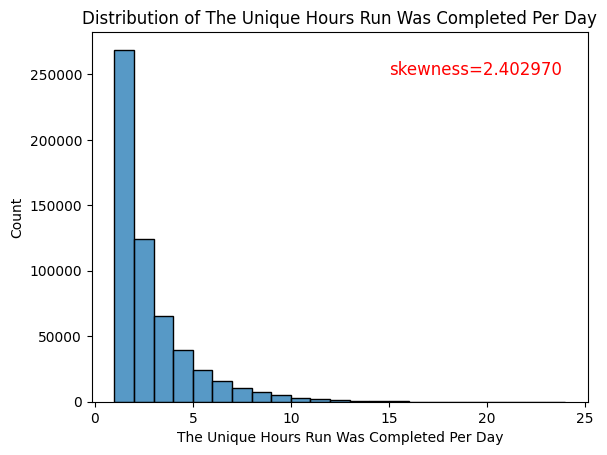

In [ ]:
# histogram for UNIQUE_HOURS_RUN
sns.histplot(data=df, x='UNIQUE_HOURS_RUN', binwidth=1)
plt.text(15, 250000, 'skewness=2.402970', color='red', fontsize=12)
plt.title('Distribution of The Unique Hours Run Was Completed Per Day')
plt.xlabel('The Unique Hours Run Was Completed Per Day')
#plt.savefig('Dis_UHR.png')

<Axes: xlabel='UNIQUE_HOURS_RUN'>

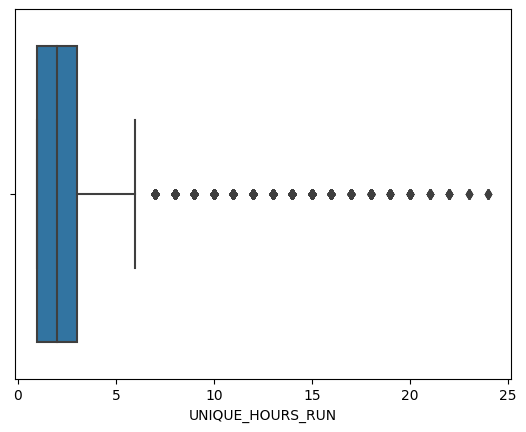

In [ ]:
# Boxplot for UNIQUE_HOURS_RUN
sns.boxplot(data=df, x='UNIQUE_HOURS_RUN')
#plt.savefig('Box_UHR.png')

Text(0.5, 9.444444444444438, 'The Total Number of Times That Tool Appeared on a Workflow Canvas')

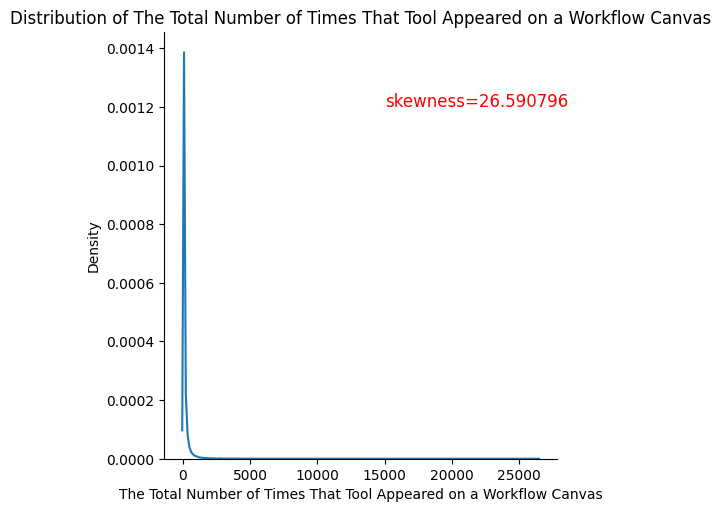

In [ ]:
# Density plot for TOOL_COUNT
sns.displot(data=df, x='TOOL_COUNT', kind='kde')
plt.text(15000, 0.0012, 'skewness=26.590796', color='red', fontsize=12)
plt.title('Distribution of The Total Number of Times That Tool Appeared on a Workflow Canvas')
plt.xlabel('The Total Number of Times That Tool Appeared on a Workflow Canvas')
#plt.savefig('Dis_TC.png', bbox_inches='tight')

<Axes: xlabel='TOOL_COUNT'>

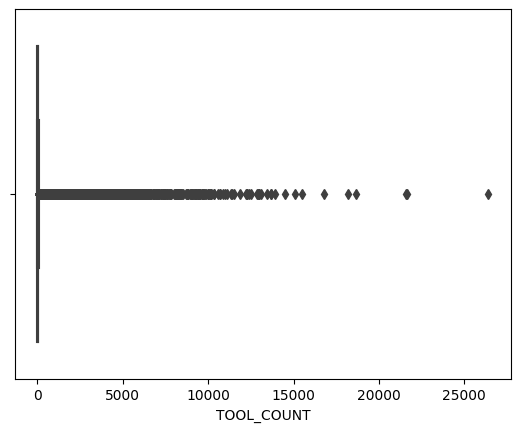

In [ ]:
# Boxplot for TOOL_COUNT
sns.boxplot(x=df['TOOL_COUNT'])
#plt.savefig('Box_TC.png')

Text(0.5, 9.444444444444438, 'The Total Number of Runs in the Workflow Canvas Per Day')

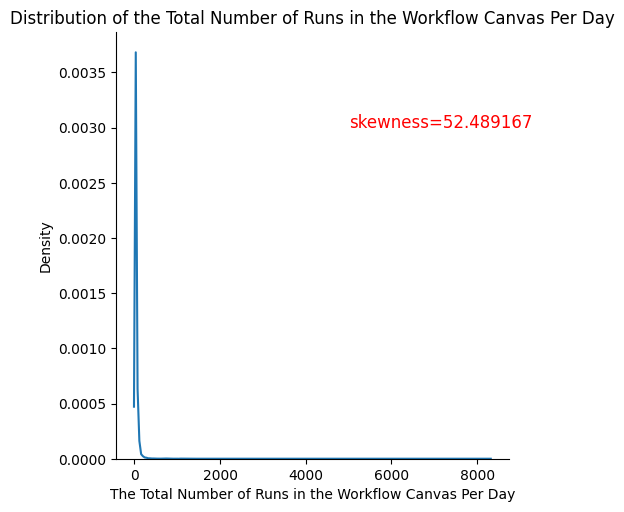

In [ ]:
# Density plot for TOTAL_RUNS
sns.displot(data=df, x='TOTAL_RUNS', kind='kde')
plt.text(5000, 0.0030, 'skewness=52.489167', color='red', fontsize=12)
plt.title('Distribution of the Total Number of Runs in the Workflow Canvas Per Day')
plt.xlabel('The Total Number of Runs in the Workflow Canvas Per Day')
#plt.savefig('Dis_TR.png', bbox_inches='tight')

<Axes: xlabel='TOTAL_RUNS'>

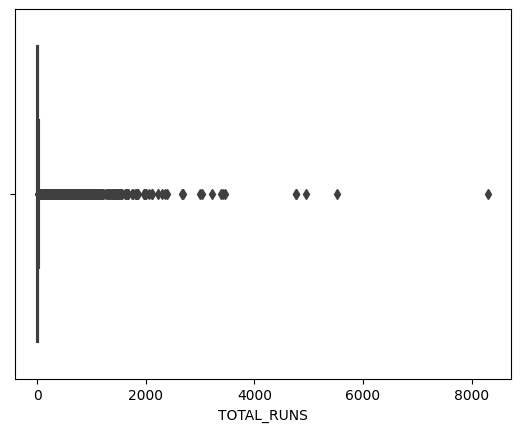

In [ ]:
# Boxplot for TOTAL_RUNS
sns.boxplot(x=df['TOTAL_RUNS'])
#plt.savefig('Box_TR.png')

The data is extremely skewed and contains lots of outliers

In [ ]:
df[['TOOL_COUNT', 'TOTAL_RUNS', 'UNIQUE_HOURS_RUN']].agg('skew').transpose()

TOOL_COUNT          26.590796
TOTAL_RUNS          52.489167
UNIQUE_HOURS_RUN     2.402970
dtype: float64

Text(0.5, 1.0, 'Relationship between TOOL_COUNT and TOTAL_RUNS')

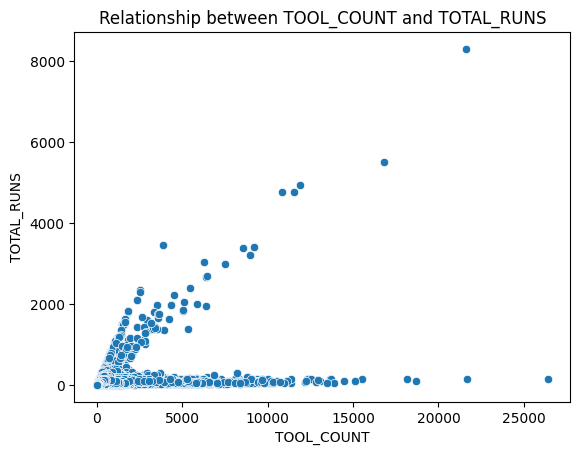

In [ ]:
# Scatter plot: TOTAL_RUNS and TOOL_COUNT
sns.scatterplot(data=df, x='TOOL_COUNT', y='TOTAL_RUNS')
plt.title('Relationship between TOOL_COUNT and TOTAL_RUNS')
#plt.savefig('TC_TR.png', bbox_inches='tight')

Text(0.5, 1.0, 'Relationship between TOOL_COUNT and UNIQUE_HOURS_RUN')

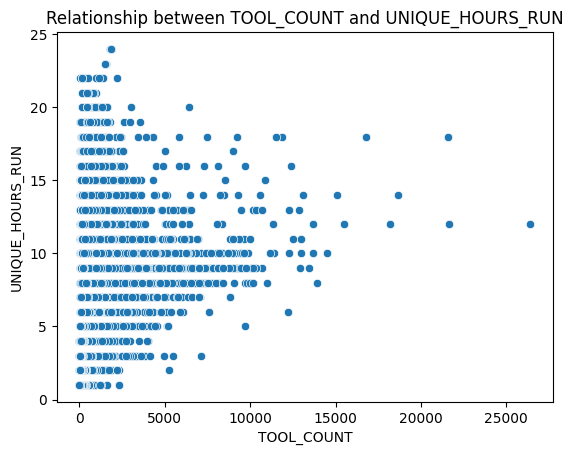

In [ ]:
# Scatter plot: TOOL_COUNT and UNIQUE_HOURS_RUN
sns.scatterplot(data=df, x='TOOL_COUNT', y='UNIQUE_HOURS_RUN')
plt.title('Relationship between TOOL_COUNT and UNIQUE_HOURS_RUN')
#plt.savefig('TC_UHR.png', bbox_inches='tight')

Text(0.5, 1.0, 'Relationship between TOTAL_RUNS and UNIQUE_HOURS_RUN')

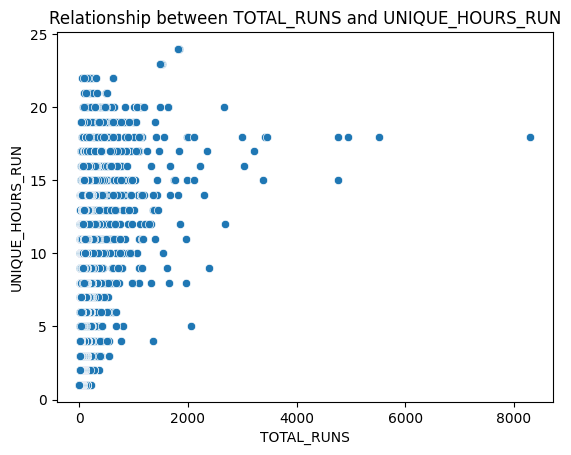

In [ ]:
# Scatter plot: TOTAL_RUNS and UNIQUE_HOURS_RUN
sns.scatterplot(data=df, x='TOTAL_RUNS', y='UNIQUE_HOURS_RUN')
plt.title('Relationship between TOTAL_RUNS and UNIQUE_HOURS_RUN')
#plt.savefig('TR_UHR.png', bbox_inches='tight')

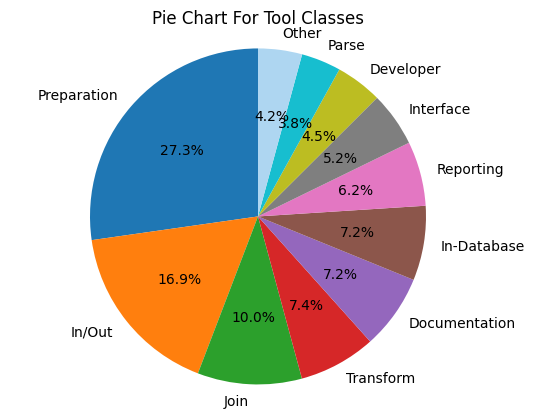

In [ ]:
# find total number of tool class
top_10_classes = df['TOOL_CLASS'].value_counts().head(10)
labels = top_10_classes.index.to_list()
values = top_10_classes.tolist()

# calculate the count of the "Other" class
total_count = df['TOOL_CLASS'].count()
other_count = total_count - sum(values)

# append the "Other" label and count to the lists
labels.append('Other')
values.append(other_count)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#AED6F1']


# create the pie chart
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Pie Chart For Tool Classes')
plt.show()

Text(0.5, 1.0, 'The Total Count of Each Tool Class that Was Used')

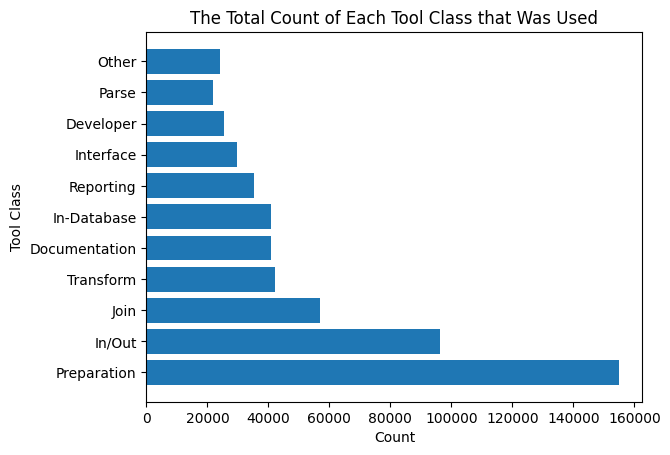

In [ ]:
# bar plot for tool_class
top_10_classes = df['TOOL_CLASS'].value_counts().head(10)
labels = top_10_classes.index.to_list()
values = top_10_classes.tolist()

# calculate the count of the "Other" class
total_count = df['TOOL_CLASS'].count()
other_count = total_count - sum(values)

# append the "Other" label and count to the lists
labels.append('Other')
values.append(other_count)

#values.sort()

plt.barh(labels, values)
plt.xlabel('Count')
plt.ylabel('Tool Class')
plt.title('The Total Count of Each Tool Class that Was Used')
#plt.xticks(rotation=90)

In [ ]:
df['TOOL_NAME'].value_counts().head(20)

Input Data         27492
Select             27072
Browse             26621
Formula            24923
Filter             23990
Join               21914
Tool Container     21722
Summarize          20438
Text Input         19123
Comment            18563
Output Data        18129
Sort               17225
Union              16414
Data Cleansing     14009
Cross Tab          10877
Text To Columns    10778
Sample              9506
Unique              8547
Append Fields       8388
Transpose           7568
Name: TOOL_NAME, dtype: int64

<ipython-input-31-b08baaaac93d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


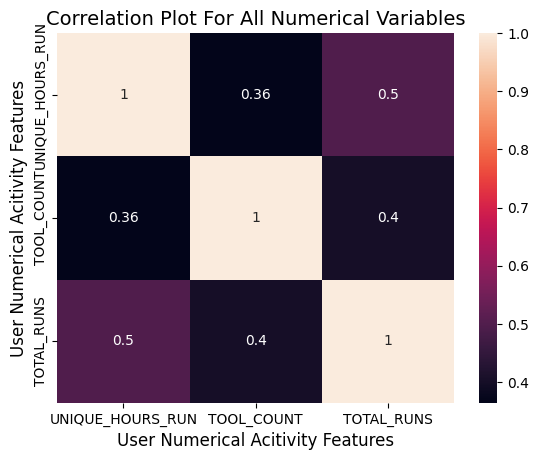

In [ ]:
# correlation plot
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Plot For All Numerical Variables', fontsize=14)
plt.xlabel('User Numerical Acitivity Features', fontsize=12)
plt.ylabel('User Numerical Acitivity Features', fontsize=12)
plt.show()

## Investigate the extremely high values

In [ ]:
print(df.loc[df['UNIQUE_HOURS_RUN']>3, 'TOOL_NAME'].nunique())
print(df.loc[df['TOOL_COUNT']>29, 'TOOL_NAME'].nunique())
print(df.loc[df['TOTAL_RUNS']>13, 'TOOL_NAME'].nunique())

183
184
198


In [ ]:
# Check TOOL_CLASS for extremely high values of hours
df.loc[df['UNIQUE_HOURS_RUN']>=20, 'TOOL_CLASS'].unique()

array(['In/Out', 'Join', 'Preparation', 'Reporting', 'Documentation',
       'Developer', 'Laboratory'], dtype=object)

Text(0.5, 1.0, 'Tool Classes run for a large amount of unique\nhours in a day (UNIQUE_HOURS_RUN>=20)')

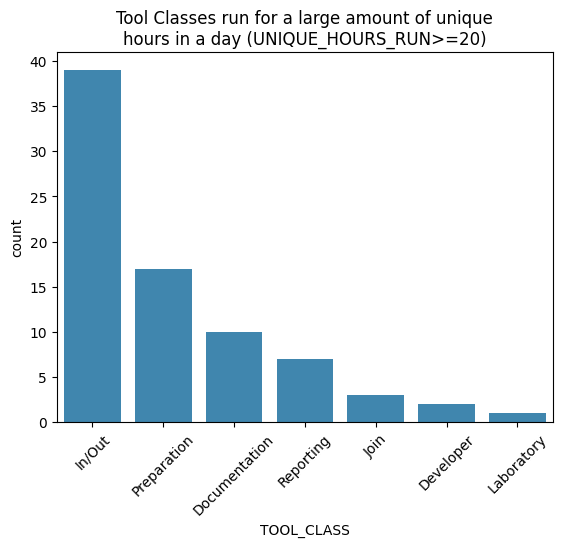

In [ ]:
# For these usages, what are the distribution of the use of tool class?
#df[df['UNIQUE_HOURS_RUN']>=20].groupby('TOOL_CLASS').size()

sns.countplot(data=df[df['UNIQUE_HOURS_RUN']>=20], x='TOOL_CLASS', order=df[df['UNIQUE_HOURS_RUN']>=20].groupby('TOOL_CLASS').size().sort_values(ascending=False).index, color="#2E8BC0")
plt.xticks(rotation=45)
plt.title('Tool Classes run for a large amount of unique\nhours in a day (UNIQUE_HOURS_RUN>=20)')
#plt.savefig('tool_class_UHR.png', bbox_inches='tight')

In [ ]:
# Check TOOL_NAME for extremely high values of hours
df.loc[df['UNIQUE_HOURS_RUN']>=20, 'TOOL_NAME'].unique()

array(['Browse', 'Input Data', 'Join', 'Sample', 'Insights',
       'Interactive Chart', 'Render', 'Select', 'Comment', 'Output Data',
       'Text Input', 'Filter', 'Formula', 'Python', 'Test',
       'Tool Container', 'Visual Layout', 'Sort'], dtype=object)

In [ ]:
# For these usage, what are the distribution of the use of tools?
df[df['UNIQUE_HOURS_RUN']>=20].groupby(['TOOL_CLASS', 'TOOL_NAME']).size()

TOOL_CLASS     TOOL_NAME        
Developer      Python                1
               Test                  1
Documentation  Comment               9
               Tool Container        1
In/Out         Browse               12
               Input Data            6
               Output Data          10
               Text Input           11
Join           Join                  3
Laboratory     Visual Layout         1
Preparation    Filter                3
               Formula               7
               Sample                2
               Select                4
               Sort                  1
Reporting      Insights              2
               Interactive Chart     2
               Render                3
dtype: int64

In [ ]:
# Check TOOL_CLASS for extremely high values of counts
df.loc[df['TOOL_COUNT']>=5000, 'TOOL_CLASS'].unique()

array(['Transform', 'Preparation', 'Documentation', 'In/Out', 'Join',
       'Developer', 'Interface'], dtype=object)

Text(0.5, 1.0, 'Tool Classes used for a large amount\nin a day (TOOL_COUNT>=5000)')

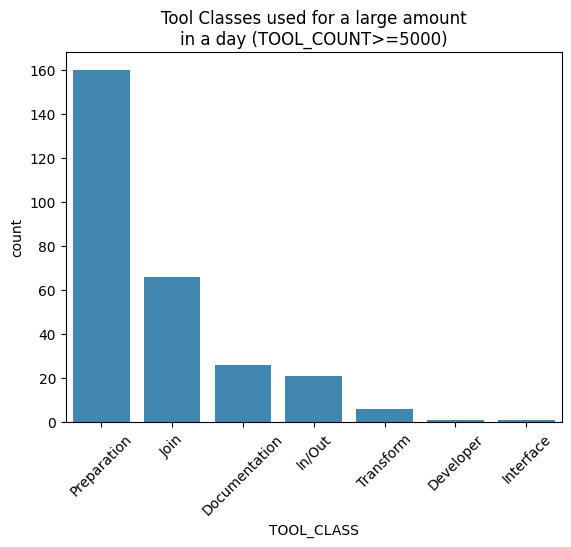

In [ ]:
sns.countplot(data=df[df['TOOL_COUNT']>=5000], x='TOOL_CLASS', order=df[df['TOOL_COUNT']>=5000].groupby('TOOL_CLASS').size().sort_values(ascending=False).index, color="#2E8BC0")
plt.xticks(rotation=45)
plt.title('Tool Classes used for a large amount\nin a day (TOOL_COUNT>=5000)')
#plt.savefig('tool_class_TC.png', bbox_inches='tight')

In [ ]:
# Check TOOL_NAME for extremely high values of counts
df.loc[df['TOOL_COUNT']>=5000, 'TOOL_NAME'].unique()

array(['Cross Tab', 'Summarize', 'Select', 'Comment', 'Text Input',
       'Browse', 'Filter', 'Formula', 'Tool Container', 'Join', 'Union',
       'Block Until Done', 'Output Data', 'Action'], dtype=object)

In [ ]:
# For these usages, what are the distribution of the use of tools? 
df[df['TOOL_COUNT']>=5000].groupby(['TOOL_CLASS', 'TOOL_NAME']).size()

TOOL_CLASS     TOOL_NAME       
Developer      Block Until Done     1
Documentation  Comment              4
               Tool Container      22
In/Out         Browse              10
               Output Data          1
               Text Input          10
Interface      Action               1
Join           Join                57
               Union                9
Preparation    Filter              30
               Formula             55
               Select              75
Transform      Cross Tab            1
               Summarize            5
dtype: int64

In [ ]:
# Check TOOL_CLASS for extremely high values of runs
df.loc[df['TOTAL_RUNS']>=1000, 'TOOL_CLASS'].unique()

array(['Documentation', 'In/Out', 'Preparation', 'Join'], dtype=object)

Text(0.5, 1.0, 'Tool Classes run for a large amount of\ntimes in a day (TOTAL_RUNS>=1000)')

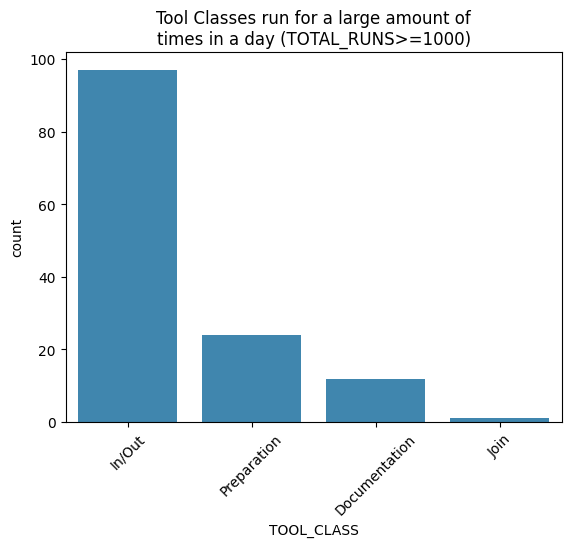

In [ ]:
sns.countplot(data=df[df['TOTAL_RUNS']>=1000], x='TOOL_CLASS', order=df[df['TOTAL_RUNS']>=1000].groupby('TOOL_CLASS').size().sort_values(ascending=False).index, color="#2E8BC0")
plt.xticks(rotation=45)
plt.title('Tool Classes run for a large amount of\ntimes in a day (TOTAL_RUNS>=1000)')
#plt.savefig('tool_class_TR.png',bbox_inches='tight')

In [ ]:
# Check TOOL_NAME for extremely high values of runs
df.loc[df['TOTAL_RUNS']>=1000, 'TOOL_NAME'].unique()

array(['Comment', 'Browse', 'Output Data', 'Text Input', 'Formula',
       'Input Data', 'Select', 'Join', 'Filter', 'Sort'], dtype=object)

In [ ]:
# For these usages, what are the distribution of the use of tools?
df[df['TOTAL_RUNS']>=1000].groupby(['TOOL_CLASS', 'TOOL_NAME']).size()

TOOL_CLASS     TOOL_NAME  
Documentation  Comment        12
In/Out         Browse         31
               Input Data      4
               Output Data    23
               Text Input     39
Join           Join            1
Preparation    Filter          1
               Formula        17
               Select          5
               Sort            1
dtype: int64

## Analysis of a sample user usage

In [ ]:
temp_user_id = df.iloc[0]['USERID']
temp_df = df[df.iloc[:, 0] == temp_user_id]
date_unique = temp_df['RUN_DATE'].unique()

# Find the tool name for Max TOOL_COUNT value
tool_list = []

# temp_df[temp_df['RUN_DATE'] == '2022-01-10T00:00:00.000000000'].sort_values(by = 'TOOL_COUNT', ascending = False).head(1)['TOOL_NAME'].iloc[0]
for date in date_unique:
  tool_list.append(temp_df[temp_df['RUN_DATE'] == date].sort_values(by = 'TOOL_COUNT', ascending = False).head(1)['TOOL_NAME'].iloc[0])
  

new_df = pd.DataFrame({'RUN_DATE':date_unique, 'Most Used Tool':tool_list})
print(new_df)

     RUN_DATE     Most Used Tool
0  2022-01-07            Comment
1  2022-01-10             Browse
2  2022-01-11  Multi-Row Formula
3  2022-01-14         Text Input
4  2022-01-18         Text Input
..        ...                ...
81 2023-02-21             Select
82 2023-02-22     Tool Container
83 2023-02-23            Formula
84 2023-02-27             Select
85 2023-02-28            Formula

[86 rows x 2 columns]


In [ ]:
df.sort_values(by = 'UNIQUE_HOURS_RUN', ascending = False).head(10)

,USERID,RUN_DATE,TOOL_CLASS,TOOL_NAME,UNIQUE_HOURS_RUN,TOOL_COUNT,TOTAL_RUNS
252344,feb618a97ca9505777823bbc7d1f3d4976352815030746...,2022-08-01,In/Out,Text Input,6,36,21
254313,feb618a97ca9505777823bbc7d1f3d4976352815030746...,2023-02-24,Preparation,Formula,6,28,11
112311,1169f54c2fa5757750b30489b8f907d76b571168f93145...,2022-11-16,CReW,CReW Expect Equal,6,32,8
117608,ae0e656bce571c3f03b93c8097a16ebea9e058e81a5e73...,2023-02-10,Address,Street Geocoder,6,36,18
276515,ffd546a75b1454e45f280ab7635d9f4432cf57c837fcba...,2022-12-13,Preparation,Multi-Row Formula,6,17,17
276517,ffd546a75b1454e45f280ab7635d9f4432cf57c837fcba...,2022-12-13,Preparation,Sort,6,23,19
112309,1169f54c2fa5757750b30489b8f907d76b571168f93145...,2022-11-15,Transform,Transpose,6,39,11
386827,f4cd6ff44cdc8234ead02299a1e288a2e9c598f3bccb26...,2022-11-16,Preparation,Filter,6,66,19
160770,43e48c5344277a602d2702f6409edde4915644147b114b...,2022-09-30,Join,Append Fields,6,31,23
254315,feb618a97ca9505777823bbc7d1f3d4976352815030746...,2023-02-24,Preparation,Select,6,23,11


# Remove outliers

In [ ]:
print('Original size:', df.shape[0], 'rows')

Original size: 568358 rows


In [ ]:
temp = df[['UNIQUE_HOURS_RUN', 'TOOL_COUNT', 'TOTAL_RUNS']]
Q1 = temp.quantile(0.25)
Q3 = temp.quantile(0.75)
IQR = Q3-Q1
df = df.loc[((df[['UNIQUE_HOURS_RUN', 'TOOL_COUNT', 'TOTAL_RUNS']]>=Q1-1.5*IQR)&(df[['UNIQUE_HOURS_RUN', 'TOOL_COUNT', 'TOTAL_RUNS']]<=Q3+1.5*IQR)).all(axis=1),:].reset_index(drop=True)


Text(0.5, 1.0, 'Distribution of The Number of Unique Hour Run Was Completed')

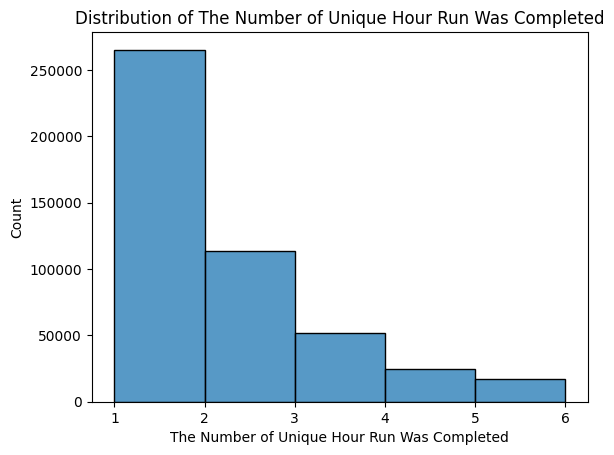

In [ ]:
sns.histplot(data=df, x='UNIQUE_HOURS_RUN', binwidth=1)
plt.xlabel('The Number of Unique Hour Run Was Completed')
plt.title('Distribution of The Number of Unique Hour Run Was Completed')

Text(0.5, 1.0, 'Distribution of the Total Number of Tools Appeared on the Workflow Canvas')

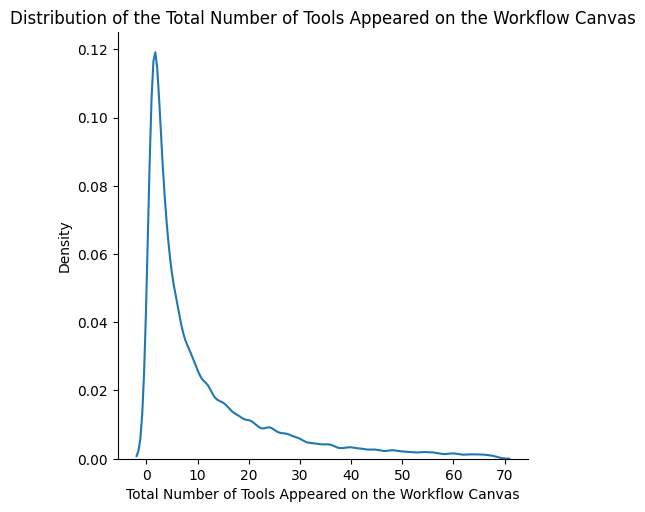

In [ ]:
# Density plot for TOOL_COUNT
sns.displot(data=df, x='TOOL_COUNT', kind='kde')
plt.xlabel('Total Number of Tools Appeared on the Workflow Canvas')
plt.title('Distribution of the Total Number of Tools Appeared on the Workflow Canvas')

Text(0.5, 1.0, 'Distribution of the Total Number of Runs in the Workflow Canvas')

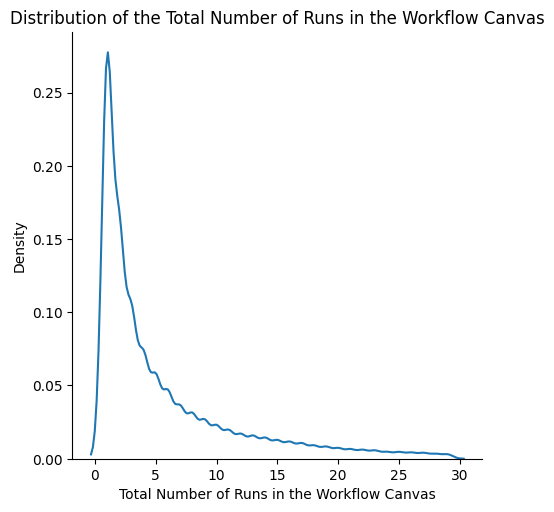

In [ ]:
# Density plot for TOTAL_RUNS
sns.displot(data=df, x='TOTAL_RUNS', kind='kde')
plt.xlabel('Total Number of Runs in the Workflow Canvas')
plt.title('Distribution of the Total Number of Runs in the Workflow Canvas')

# Feature Engineering

In [ ]:
# Calculate AVG_HOURLY_RUN
df['AVG_HOURLY_RUN'] = df['TOTAL_RUNS']/df['UNIQUE_HOURS_RUN']

In [ ]:
df['AVG_HOURLY_RUN'].agg('skew').transpose()

2.962779093072979

Text(0.5, 1.0, 'Distribution of AVG_HOURLY_RUN')

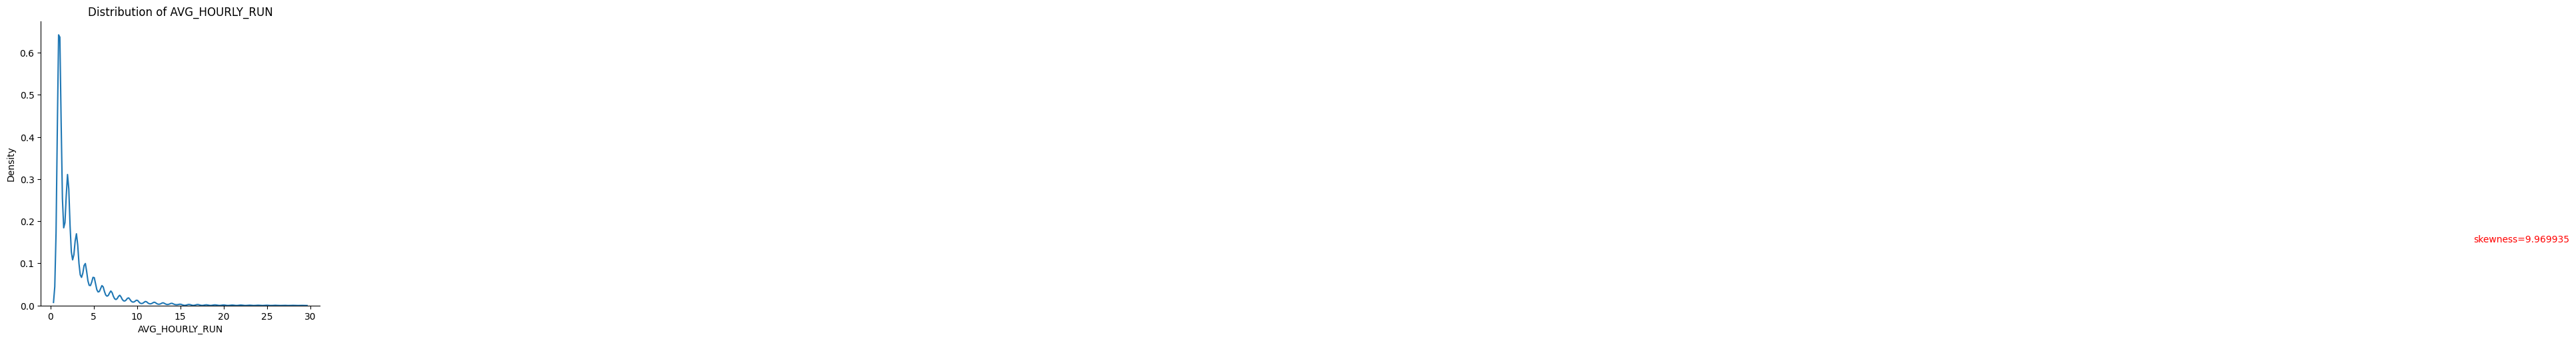

In [ ]:
sns.displot(data=df, x='AVG_HOURLY_RUN', kind='kde')
plt.text(280,0.150,'skewness=9.969935', color='red')
plt.title('Distribution of AVG_HOURLY_RUN')

In [ ]:
# Calculate DAY_DIFF
df['DAY_DIFF'] = (df['RUN_DATE']-df.groupby('USERID')['RUN_DATE'].transform('min')).dt.days

In [ ]:
# Calculate day period
df['Period_5'] = df['DAY_DIFF'] // 5 + 1
df['Period_7'] = df['DAY_DIFF'] // 7 + 1

In [ ]:
df.head(3)

,USERID,RUN_DATE,TOOL_CLASS,TOOL_NAME,UNIQUE_HOURS_RUN,TOOL_COUNT,TOTAL_RUNS,AVG_HOURLY_RUN,DAY_DIFF,Period_5,Period_7
0,40924be34779db43793960c131baa2c49144f2adba22a6...,2022-01-07,Documentation,Comment,1,15,3,3.0,0,1,1
1,40924be34779db43793960c131baa2c49144f2adba22a6...,2022-01-07,In/Out,Browse,1,6,3,3.0,0,1,1
2,40924be34779db43793960c131baa2c49144f2adba22a6...,2022-01-07,In/Out,Input Data,1,6,3,3.0,0,1,1


# Deep Users

User score = Frequency * tool wideness

Frequency: How often a user use the platform within a period

Tool wideness: Number of unique tool lists used within a period

## Group tools to lists & Calculate tool wideness score

In [ ]:
print(df.columns)
df.head()

Index(['USERID', 'RUN_DATE', 'TOOL_CLASS', 'TOOL_NAME', 'UNIQUE_HOURS_RUN',
       'TOOL_COUNT', 'TOTAL_RUNS', 'AVG_HOURLY_RUN', 'DAY_DIFF', 'Period_5',
       'Period_7', 'zscore'],
      dtype='object')


,USERID,RUN_DATE,TOOL_CLASS,TOOL_NAME,UNIQUE_HOURS_RUN,TOOL_COUNT,TOTAL_RUNS,AVG_HOURLY_RUN,DAY_DIFF,Period_5,Period_7,zscore
0,40924be34779db43793960c131baa2c49144f2adba22a6...,2022-01-07,Documentation,Comment,1,15,3,3.0,0,1,1,-0.150034
1,40924be34779db43793960c131baa2c49144f2adba22a6...,2022-01-07,In/Out,Browse,1,6,3,3.0,0,1,1,-0.577985
2,40924be34779db43793960c131baa2c49144f2adba22a6...,2022-01-07,In/Out,Input Data,1,6,3,3.0,0,1,1,-0.494974
3,40924be34779db43793960c131baa2c49144f2adba22a6...,2022-01-07,Preparation,Auto Field,1,3,3,3.0,0,1,1,-0.425716
4,40924be34779db43793960c131baa2c49144f2adba22a6...,2022-01-07,Preparation,Filter,1,3,3,3.0,0,1,1,-0.787292


In [ ]:
cluster_r = df[['USERID','RUN_DATE','UNIQUE_HOURS_RUN','TOOL_NAME']]
cluster = cluster_r.groupby(['USERID','RUN_DATE','UNIQUE_HOURS_RUN']).count()
cluster = cluster.rename(columns={'TOOL_NAME':'UNIQUE_TOOL_NUMBER'}).reset_index()
cluster['TOOL_LIST'] = cluster_r.groupby(['USERID','RUN_DATE','UNIQUE_HOURS_RUN'])['TOOL_NAME'].apply(lambda x: ', '.join(x)).reset_index()['TOOL_NAME']

cluster.head()

,USERID,RUN_DATE,UNIQUE_HOURS_RUN,UNIQUE_TOOL_NUMBER,TOOL_LIST
0,00080769b607549fe4368730bf28e30d77c6cd58a2d85e...,2022-09-22,2,2,"Browse, Input Data"
1,00080769b607549fe4368730bf28e30d77c6cd58a2d85e...,2022-10-03,1,2,"Browse, Input Data"
2,003a0a5c6d2393bfaa27e53bc5b72b4c890bd3937fa9af...,2022-09-22,1,4,"Output Data, Check Box, List Box, Radio Button"
3,003a0a5c6d2393bfaa27e53bc5b72b4c890bd3937fa9af...,2022-09-22,2,3,"Text Input, Action, Tab"
4,003a0a5c6d2393bfaa27e53bc5b72b4c890bd3937fa9af...,2022-09-22,3,1,Python


In [ ]:
from collections import Counter
cnt = Counter(cluster['TOOL_LIST'])  # Frequency of combination of tool list
print(cnt.most_common(25))
cnt_df = pd.DataFrame(cnt.items()).rename(columns={0:'Tool_list',1:'freq'})  # to DataFrame

[('Input Data', 2048), ('Browse', 1350), ('Text Input', 954), ('Output Data', 819), ('Browse, Input Data', 735), ('Select', 555), ('Formula', 440), ('Filter', 438), ('Tool Container', 433), ('Summarize', 403), ('Join', 368), ('Sort', 354), ('Union', 284), ('Comment', 272), ('Data Cleansing', 269), ('Input Data, Output Data', 267), ('Unique', 259), ('Browse, Text Input', 248), ('Sample', 212), ('Input Data, Select', 196), ('Browse, Input Data, Output Data, Action, File Browse, Tab, Data Cleansing, Formula, Select', 184), ('Cross Tab', 160), ('Text To Columns', 158), ('Comment, Tool Container, Browse, Input Data, Join, Data Cleansing, Filter, Formula, Select, Insights', 150), ('Text Input, Formula', 145)]


In [ ]:
cnt_df['UNIQUE_TOOL_NUMBER'] = cnt_df['Tool_list'].apply(lambda x: len(x.split(','))).reset_index()['Tool_list']
cnt_df.head()

,Tool_list,freq,UNIQUE_TOOL_NUMBER
0,"Browse, Input Data",735,2
1,"Output Data, Check Box, List Box, Radio Button",1,4
2,"Text Input, Action, Tab",3,3
3,Python,103,1
4,"Python, Tool Container, Action, Drop Down, Tab",1,5


In [ ]:
cnt_df.describe()

,freq,UNIQUE_TOOL_NUMBER
count,39784.000000,39784.000000
mean,1.831842,8.804645
std,16.368922,5.996748
min,1.000000,1.000000
25%,1.000000,4.000000
50%,1.000000,7.000000
75%,1.000000,11.000000
max,2048.000000,57.000000


In [ ]:
#2 tools as a group
cnt_df_with_UTN2 = cnt_df[cnt_df.UNIQUE_TOOL_NUMBER == 2][cnt_df.freq > 1].sort_values(by = ['freq'], ascending = False)
cnt_df_with_UTN2.describe()

<ipython-input-23-c4f82099a818>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cnt_df_with_UTN2 = cnt_df[cnt_df.UNIQUE_TOOL_NUMBER == 2][cnt_df.freq > 1].sort_values(by = ['freq'], ascending = False)


,freq,UNIQUE_TOOL_NUMBER
count,858.000000,858.0
mean,10.700466,2.0
std,32.290109,0.0
min,2.000000,2.0
25%,2.000000,2.0
50%,4.000000,2.0
75%,8.000000,2.0
max,735.000000,2.0


In [ ]:
# 3 tools as a group
cnt_df_with_UTN3 = cnt_df[cnt_df.UNIQUE_TOOL_NUMBER==3][cnt_df.freq>1].sort_values(by = ['freq'], ascending = False)
cnt_df_with_UTN3.describe()

<ipython-input-24-d9cb40feec73>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cnt_df_with_UTN3 = cnt_df[cnt_df.UNIQUE_TOOL_NUMBER==3][cnt_df.freq>1].sort_values(by = ['freq'], ascending = False)


,freq,UNIQUE_TOOL_NUMBER
count,973.000000,973.0
mean,4.941418,3.0
std,7.155364,0.0
min,2.000000,3.0
25%,2.000000,3.0
50%,3.000000,3.0
75%,5.000000,3.0
max,90.000000,3.0


In [ ]:
# 4 tools as a group
cnt_df_with_UTN4 = cnt_df[cnt_df.UNIQUE_TOOL_NUMBER==4][cnt_df.freq>1].sort_values(by = ['freq'], ascending = False)
cnt_df_with_UTN4.describe()

<ipython-input-25-b98f2825e11c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cnt_df_with_UTN4 = cnt_df[cnt_df.UNIQUE_TOOL_NUMBER==4][cnt_df.freq>1].sort_values(by = ['freq'], ascending = False)


,freq,UNIQUE_TOOL_NUMBER
count,645.000000,645.0
mean,3.965891,4.0
std,5.997314,0.0
min,2.000000,4.0
25%,2.000000,4.0
50%,2.000000,4.0
75%,4.000000,4.0
max,102.000000,4.0


In [ ]:
print(cnt_df_with_UTN2.quantile(0.9, interpolation ='lower'))
print()
print(cnt_df_with_UTN4.quantile(0.9, interpolation ='lower'))

In [ ]:
# Define Global Params
# Flexible to change
THRESHOLD_FOR_CLASS_OF_2 = cnt_df_with_UTN2['freq'].quantile(0.9, interpolation ='lower')
THRESHOLD_FOR_CLASS_OF_3 = cnt_df_with_UTN3['freq'].quantile(0.9, interpolation ='lower')
THRESHOLD_FOR_CLASS_OF_4 = cnt_df_with_UTN4['freq'].quantile(0.9, interpolation ='lower')
THRESHOLD_SPECIAL = 15
THRESHOLD_SPECIAL_NUM_CASE = 4

In [ ]:
cnt_df_with_UTNS = cnt_df[cnt_df.UNIQUE_TOOL_NUMBER>4][cnt_df.freq>1].sort_values(by = ['freq'], ascending = False)
cnt_df_with_UTNS['freq'].quantile(0.9, interpolation ='lower')

<ipython-input-28-f263536a52cd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cnt_df_with_UTNS = cnt_df[cnt_df.UNIQUE_TOOL_NUMBER>4][cnt_df.freq>1].sort_values(by = ['freq'], ascending = False)


6

In [ ]:
def toolListToCluster(df, unique_tool_number, thres):
    res = df.loc[df.UNIQUE_TOOL_NUMBER==unique_tool_number].loc[df.freq >= thres]\
                .sort_values(by = ['freq'], ascending = False).reset_index(drop=True)
    return [set(line.split(", ")) for line in res.Tool_list.to_list()]

In [ ]:
tool_list_cluster_of_2 = toolListToCluster(cnt_df, 2, THRESHOLD_FOR_CLASS_OF_2)
tool_list_cluster_of_3 = toolListToCluster(cnt_df, 3, THRESHOLD_FOR_CLASS_OF_3)
tool_list_cluster_of_4 = toolListToCluster(cnt_df, 4, THRESHOLD_FOR_CLASS_OF_4)
tool_list_cluster_special = cnt_df.loc[cnt_df.UNIQUE_TOOL_NUMBER>THRESHOLD_SPECIAL_NUM_CASE] \
                              .loc[cnt_df.freq >= THRESHOLD_SPECIAL] \
                              .sort_values(by = ['freq'], ascending = False).reset_index(drop=True)
tool_list_cluster_special = [set(line.split(", ")) for line in tool_list_cluster_special.Tool_list.to_list()]

# Reduce clusters of size 3
temp = tool_list_cluster_of_3
tool_list_cluster_of_3 = []
for cluster_of_3 in temp:
    if not any([cluster_of_2.issubset(cluster_of_3) for cluster_of_2 in tool_list_cluster_of_2]):
        tool_list_cluster_of_3.append(cluster_of_3)


# Reduce clusters of size 4
temp = tool_list_cluster_of_4
tool_list_cluster_of_4 = []
for cluster_of_4 in temp:
    if not any([cluster_of_2.issubset(cluster_of_4) for cluster_of_2 in tool_list_cluster_of_2]) and \
      not any([cluster_of_3.issubset(cluster_of_4) for cluster_of_3 in tool_list_cluster_of_3]):
        tool_list_cluster_of_4.append(cluster_of_4)
print(tool_list_cluster_special)

[{'Tab', 'Input Data', 'Output Data', 'File Browse', 'Formula', 'Select', 'Action', 'Data Cleansing', 'Browse'}, {'Input Data', 'Formula', 'Select', 'Insights', 'Data Cleansing', 'Join', 'Comment', 'Browse', 'Filter', 'Tool Container'}, {'Date Time Now', 'Report Text', 'Browse', 'Join Multiple', 'Cross Tab', 'Data Cleansing', 'Layout', 'Comment', 'Append Fields', 'Table', 'Email', 'Select', 'Union', 'Summarize', 'Sample', 'Sort', 'Record ID', 'DateTime', 'Tool Container', 'Text Input', 'Transpose', 'Formula', 'Join', 'Filter'}, {'Browse', 'Render', 'Modeling', 'Data Cleansing', 'Layout', 'Comment', 'Input Data', 'Table', 'Select', 'Union', 'Summarize', 'Sort', 'Interactive Chart', 'Tool Container', 'Output Data', 'Formula', 'Join', 'Filter', 'Image'}, {'Text To Columns', 'Output Data', 'Formula', 'Select', 'Union', 'Join', 'Filter', 'Browse', 'Summarize', 'DateTime', 'Tool Container'}, {'Input Data', 'Output Data', 'Formula', 'Select', 'Insights', 'Join', 'Comment', 'Browse', 'Modeling

In [ ]:
len(tool_list_cluster_special)

48

In [ ]:
tool_list_cluster = sorted((tool_list_cluster_of_2 + 
               tool_list_cluster_of_3 + 
               tool_list_cluster_of_4 + 
               tool_list_cluster_special +
               list(map(lambda x: {x}, df.TOOL_NAME.unique().tolist()))), key = lambda x: -len(x))

In [ ]:
def aggToolCount2df(df, tool_list_cluster):
  df = df.copy()
  df["AGG_TOOL_NUMBER"] = 0
  # df["TOOL_LIST_COPY"] = df.TOOL_LIST
  temp = [set(line.split(', ')) for line in df['TOOL_LIST'].to_list()]
  
  for row, tool in enumerate(temp):
  # for idx, row in enumerate(df.TOOL_LIST_COPY):
    group_number = 0
    # tool = set(row.split(", "))
    for tool_set in tool_list_cluster:
      if tool_set.issubset(tool):
        group_number += 1
        df.loc[row, 'AGG_TOOL_NUMBER'] = group_number
        # df.loc[idx, 'TOOL_LIST_COPY'] = ", ".join(tool - tool_set)
        tool -= tool_set

  return df

In [ ]:
grouped = df[['USERID','RUN_DATE','TOOL_NAME']]
agg = grouped.groupby(['USERID','RUN_DATE']).count()
agg = agg.rename(columns={'TOOL_NAME':'UNIQUE_TOOL_NUMBER'}).reset_index()
agg['TOOL_LIST'] = grouped.groupby(['USERID','RUN_DATE'])['TOOL_NAME'].apply(lambda x: ', '.join(x)).reset_index()['TOOL_NAME']
agg.head()

,USERID,RUN_DATE,UNIQUE_TOOL_NUMBER,TOOL_LIST
0,00080769b607549fe4368730bf28e30d77c6cd58a2d85e...,2022-09-22,2,"Browse, Input Data"
1,00080769b607549fe4368730bf28e30d77c6cd58a2d85e...,2022-10-03,2,"Browse, Input Data"
2,003a0a5c6d2393bfaa27e53bc5b72b4c890bd3937fa9af...,2022-09-22,8,"Python, Output Data, Text Input, Action, Check..."
3,003a0a5c6d2393bfaa27e53bc5b72b4c890bd3937fa9af...,2022-09-23,5,"Python, Tool Container, Action, Drop Down, Tab"
4,003a0a5c6d2393bfaa27e53bc5b72b4c890bd3937fa9af...,2022-09-30,1,Python


In [ ]:
aggTool = aggToolCount2df(agg, tool_list_cluster)

In [ ]:
aggTool.to_csv('df_tool_lst.csv', index=False)

### Tool Lists Analysis

In [ ]:
aggTool.head()

,USERID,RUN_DATE,UNIQUE_TOOL_NUMBER,TOOL_LIST,AGG_TOOL_NUMBER
0,00080769b607549fe4368730bf28e30d77c6cd58a2d85e...,2022-09-22,2,"Browse, Input Data",1
1,00080769b607549fe4368730bf28e30d77c6cd58a2d85e...,2022-10-03,2,"Browse, Input Data",1
2,003a0a5c6d2393bfaa27e53bc5b72b4c890bd3937fa9af...,2022-09-22,8,"Python, Output Data, Text Input, Action, Check...",6
3,003a0a5c6d2393bfaa27e53bc5b72b4c890bd3937fa9af...,2022-09-23,5,"Python, Tool Container, Action, Drop Down, Tab",4
4,003a0a5c6d2393bfaa27e53bc5b72b4c890bd3937fa9af...,2022-09-30,1,Python,1


In [ ]:
aggTool.AGG_TOOL_NUMBER.describe()

count    35346.000000
mean         8.254626
std          7.179939
min          1.000000
25%          3.000000
50%          6.000000
75%         12.000000
max         80.000000
Name: AGG_TOOL_NUMBER, dtype: float64

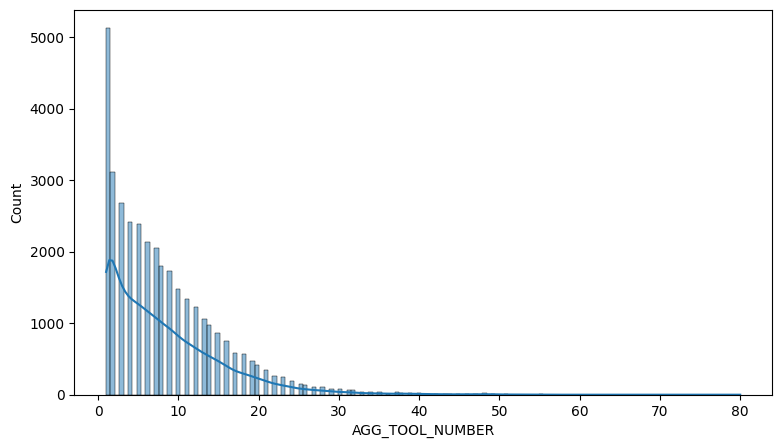

In [ ]:
############# Distribution plot #############

plt.figure(figsize=(9, 5))
res = sns.histplot(aggTool['AGG_TOOL_NUMBER'], 
                   kde=True)

# Uncomment to see bar labels
# labels = []
# for p in res.patches:
#     h = p.get_height()
#     labels.append(str(h) if h else '')
# res.bar_label(res.containers[1], labels=labels)

plt.show()

In [ ]:
############# Quantile Analysis #############
print(f"Baseline for top 50%% users: %s" % aggTool.AGG_TOOL_NUMBER.quantile(0.5, interpolation ='lower'))
print(f"Baseline for top 25%% users: %s" % aggTool.AGG_TOOL_NUMBER.quantile(0.75, interpolation ='lower'))
print(f"Baseline for top 10%% users: %s" % aggTool.AGG_TOOL_NUMBER.quantile(0.9, interpolation ='lower'))

Baseline for top 50% users: 6
Baseline for top 25% users: 12
Baseline for top 10% users: 18


In [ ]:
df_aggTool = aggTool.merge(df[['USERID', 'RUN_DATE', 'Period_5', 'Period_7']].drop_duplicates(), how='left', on=['USERID', 'RUN_DATE'])

In [ ]:
df_aggTool.head(3)

,USERID,RUN_DATE,UNIQUE_TOOL_NUMBER,TOOL_LIST,AGG_TOOL_NUMBER,Period_5,Period_7
0,00080769b607549fe4368730bf28e30d77c6cd58a2d85e...,2022-09-22,2,"Browse, Input Data",1,1,1
1,00080769b607549fe4368730bf28e30d77c6cd58a2d85e...,2022-10-03,2,"Browse, Input Data",1,3,2
2,003a0a5c6d2393bfaa27e53bc5b72b4c890bd3937fa9af...,2022-09-22,8,"Python, Output Data, Text Input, Action, Check...",6,1,1


In [ ]:
#df_aggTool.to_csv('df_tool_list.csv', index=False)

## Calculate Frequency

In [ ]:
# Frequency for period 5
df_p5 = df.groupby(['USERID', 'Period_5'])['RUN_DATE'].nunique().reset_index(name='Frequency_5')
df_aggTool_p5 = df_aggTool.groupby(['USERID', 'Period_5'])['AGG_TOOL_NUMBER'].sum().reset_index(name='AGG_TOOL_NUMBER_5')
df_p5 = df_p5.merge(df_aggTool_p5, on=['USERID', 'Period_5'], how='left')

# Frequency for period 7
df_p7 = df.groupby(['USERID', 'Period_7'])['RUN_DATE'].nunique().reset_index(name='Frequency_7')
df_aggTool_p7 = df_aggTool.groupby(['USERID', 'Period_7'])['AGG_TOOL_NUMBER'].sum().reset_index(name='AGG_TOOL_NUMBER_7')
df_p7 = df_p7.merge(df_aggTool_p7, on=['USERID', 'Period_7'], how='left')

In [ ]:
df_p5.head(3)

,USERID,Period_5,Frequency_5,AGG_TOOL_NUMBER_5
0,00080769b607549fe4368730bf28e30d77c6cd58a2d85e...,1,1,1
1,00080769b607549fe4368730bf28e30d77c6cd58a2d85e...,3,1,1
2,003a0a5c6d2393bfaa27e53bc5b72b4c890bd3937fa9af...,1,2,10


In [ ]:
df_p7.head(3)

,USERID,Period_7,Frequency_7,AGG_TOOL_NUMBER_7
0,00080769b607549fe4368730bf28e30d77c6cd58a2d85e...,1,1,1
1,00080769b607549fe4368730bf28e30d77c6cd58a2d85e...,2,1,1
2,003a0a5c6d2393bfaa27e53bc5b72b4c890bd3937fa9af...,1,2,10


In [ ]:
print(df_p5.shape)
print(df_p7.shape)

(16956, 4)
(13931, 4)


In [ ]:
df_p7['USERID'].nunique()

#df[df['USERID'] == '00080769b607549fe4368730bf28e30d77c6cd58a2d85e4ee879459b2998ae76']['RUN_DATE']

845

### Check Distribution For Frequency

In [ ]:
temp_5 = user_df_5.groupby('Period_5')['Frequency_5'].mean().reset_index(name='Avg_Frequency_5') # groupby period and calculate average frequency to see a general trend for all user
temp_7 = user_df_7.groupby('Period_7')['Frequency_7'].mean().reset_index(name='Avg_Frequency_7')

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt

NameError: ignored

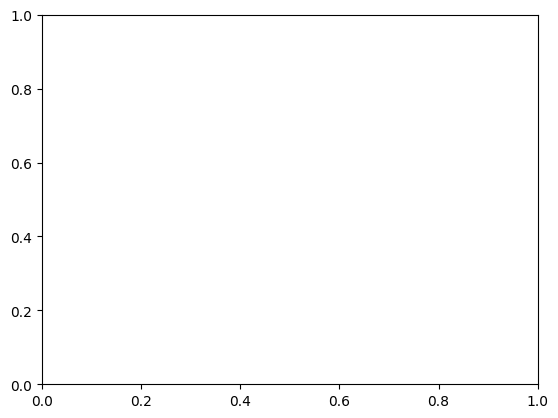

In [ ]:
# create a figure and axis
fig, ax = plt.subplots()

# plot the data as a timeline
ax.plot(temp_5['Period_5'], temp_5['Avg_Frequency_5'] , linestyle='solid')

# set the x-axis limits
ax.set_xlim([0, max(temp_5['Period_5'])])

# set the axis labels and title
ax.set_xlabel('Period')
ax.set_ylabel('Frequency')
ax.set_title('Timeline for period5')

# display the plot
plt.show()

In [ ]:
# create a figure and axis
fig, ax = plt.subplots()

# plot the data as a timeline
ax.plot(temp_7['Period_7'], temp_7['Avg_Frequency_7'] , linestyle='solid')

# set the x-axis limits
ax.set_xlim([0, max(temp_7['Period_7'])])

# set the axis labels and title
ax.set_xlabel('Period')
ax.set_ylabel('Frequency')
ax.set_title('Timeline for period7')

# display the plot
plt.show()

## Aggregate Other Features

In [ ]:
df_agg_feature_p5 = df.groupby(by=['USERID', 'Period_5'])[['UNIQUE_HOURS_RUN', 'TOOL_COUNT', 'TOTAL_RUNS', 'AVG_HOURLY_RUN']].mean()\
.reset_index().copy()
df_agg_feature_p7 = df.groupby(by=['USERID', 'Period_7'])[['UNIQUE_HOURS_RUN', 'TOOL_COUNT', 'TOTAL_RUNS', 'AVG_HOURLY_RUN']].mean()\
.reset_index().copy()

In [ ]:
df_p5 = df_p5.merge(df_agg_feature_p5, on=['USERID', 'Period_5'], how='left')

In [ ]:
df_p7 = df_p7.merge(df_agg_feature_p7, on=['USERID', 'Period_7'], how='left')

In [ ]:
df_p5.head(3)

In [ ]:
df_p7.head(3)

## Calculate User Score

`deep user score = frequency * wideness (of tools)`

In [ ]:
df_p5['DEEP_USER_SCORE'] = df_p5['Frequency_5'] * df_p5['AGG_TOOL_NUMBER_5']
df_p7['DEEP_USER_SCORE'] = df_p7['Frequency_7'] * df_p7['AGG_TOOL_NUMBER_7']

In [ ]:
df_p7['DEEP_USER_SCORE_log'] = np.log10(df_p7['DEEP_USER_SCORE'])
df_p7 = df_p7.rename(columns={'Period_7':'PERIOD', 'Frequency_7':'FREQUENCY', 'AGG_TOOL_NUMBER_7':'AGG_TOOL_NUMBER', 'DEEP_USER_SCORE_log':'DEEP_USER_SCORE_LOG'})
df_p7.head()

,USERID,PERIOD,FREQUENCY,AGG_TOOL_NUMBER,DEEP_USER_SCORE,DEEP_USER_SCORE_LOG
0,00080769b607549fe4368730bf28e30d77c6cd58a2d85e...,1,1,1,1,0.00000
1,00080769b607549fe4368730bf28e30d77c6cd58a2d85e...,2,1,1,1,0.00000
2,003a0a5c6d2393bfaa27e53bc5b72b4c890bd3937fa9af...,1,2,10,20,1.30103
3,003a0a5c6d2393bfaa27e53bc5b72b4c890bd3937fa9af...,2,1,1,1,0.00000
4,003a0a5c6d2393bfaa27e53bc5b72b4c890bd3937fa9af...,12,1,5,5,0.69897


In [ ]:
# Fill missing period with 0 for each user
# period = [i for i in range(1,62)]
# userid = df_p7['USERID'].unique()
# idx = pd.MultiIndex.from_product((userid, period), names=['USERID', 'PERIOD'])
# df_p7 = df_p7.set_index(['USERID', 'PERIOD'])\
# .reindex(idx, fill_value=0).reset_index()

#df_p7.to_csv('df_p7.csv', index=False)

## Spaghetti Plot for User Score

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
file_id = '18iA3lE8laNGa27TyRZcwm-7q-SAcilRB'
download = drive.CreateFile({'id': file_id})
download.GetContentFile('df_p7.csv')
df_p7 = pd.read_csv('df_p7.csv')
df_p7.head(5)

In [ ]:
plt.style.use('ggplot')

user_lst = df_p7['USERID'].unique()
for id in user_lst:
  X = df_p7.loc[df_p7['USERID']==id, 'PERIOD']
  Y = df_p7.loc[df_p7['USERID']==id, 'DEEP_USER_SCORE_LOG']

  plt.plot(X, Y)

plt.xlim(left=0)
plt.show()

In [ ]:

def ax_plot(df, userid, ax):
  print(len(userid))
  for id in userid:
    ax.plot(df.loc[df['USERID']==id, 'PERIOD'], df.loc[df['USERID']==id, 'DEEP_USER_SCORE_LOG'])

userid = df_p7['USERID'].unique()
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3)

ax_plot(df_p7, userid[0:140], ax1)
ax_plot(df_p7, userid[140:280], ax2)
ax_plot(df_p7, userid[280:420], ax3)
ax_plot(df_p7, userid[420:560], ax4)
ax_plot(df_p7, userid[560:700], ax5)
ax_plot(df_p7, userid[700:], ax6)

plt.show()

In [ ]:
import statsmodels.api as sm

lowess = sm.nonparametric.lowess(df_p7['DEEP_USER_SCORE'], df_p7['PERIOD'], frac=0.1)


sns.lineplot(x='PERIOD', y='DEEP_USER_SCORE', data=df_p7[df_p7['USERID'] == '003a0a5c6d2393bfaa27e53bc5b72b4c890bd3937fa9afa486bb7d418ec2b60c'])
plt.plot(lowess[:, 0], lowess[:, 1], c='r', linewidth=2)

sns.set_style("whitegrid")
sns.despine()
plt.xlabel('Year-Month')
plt.ylabel('Passengers')
plt.title('Passenger Traffic Over Time')

In [ ]:
import plotly.graph_objects as go

# Create an empty list to store user traces
user_traces = []

user_lst = df_p7['USERID'].unique()

# Generate a color palette
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create traces for each user
for i, user_id in enumerate(user_lst):
    X = df_p7.loc[df_p7['USERID'] == user_id, 'PERIOD']
    Y = df_p7.loc[df_p7['USERID'] == user_id, 'DEEP_USER_SCORE_LOG']
    trace = go.Scatter(
        x=X,
        y=Y,
        name=user_id,
        line=dict(color=color_palette[i % len(color_palette)]),
        # opacity=0.1,
        hovertemplate=f'User ID: {user_id}<br>Period: %{{x}}<br>Score: %{{y}}',
        visible=True
    )
    user_traces.append(trace)

mean_trace = go.Scatter(
    x=X,
    y=df_p7.groupby('PERIOD')['DEEP_USER_SCORE_LOG'].mean().dropna(),
    name='Mean',
    line=dict(color='black', width=2),
    # opacity=0.3,
    hovertemplate='Mean<br>Period: %{x}<br>Score: %{y:.2f}',
    visible=False
)
user_traces.append(mean_trace)

# Create a layout for the plot
layout = go.Layout(
    title='User Scores Over Time',
    xaxis=dict(title='Period'),
    yaxis=dict(title='Deep User Score (Log Scale)'),
    showlegend=False
)

# Create a figure with traces and layout
fig = go.Figure(data=user_traces, layout=layout)

# Define JavaScript code for button click event
updatemenus = [
    dict(
        buttons=list([
            dict(
                label='All Users',
                method='update',
                args=[{'visible': [True] * (len(user_traces) - 1) + [False]}]
            ),
            dict(
                label='Target',
                method='update',
                args=[{'visible': [user_id == 'ae0e656bce571c3f03b93c8097a16ebea9e058e81a5e7337cdfe12373514bdc3' for user_id in user_lst]}]
            ),
            dict(
                label='Mean',
                method='update',
                args=[{'visible': [False] * len(user_traces[:-1]) + [True]}]
            ),
            dict(
                label='Random Sample',
                method='update',
                args=[{'visible': [True] * (10) + [False] * (len(user_traces) - 10)}]
            ),
            dict(
                label='All',
                method='update',
                args=[{'visible': [True] * (len(user_traces))}],
                args2=[{'line.opacity': [0.001]*(len(user_traces) - 1) + [1]}]
            ),
            dict(
                label='Random Sample w/ mean',
                method='update',
                args=[{'visible': [True] * (10) + [False] * (len(user_traces) - 11) + [True]}, {'line.opacity': [0.001]*(len(user_traces) - 1) + [1]}]
                # args2=[{'line.opacity': [0.001]*(len(user_traces) - 1) + [1]}]
            ),
        ]),
        direction='down',
        pad={'r': 10, 't': 10},
        showactive=True,
        x=0.1,
        xanchor='left',
        y=1.1,
        yanchor='top'
    )
]

fig.update_layout(updatemenus=updatemenus)

# Show the interactive plot
fig.show()


In [ ]:
import matplotlib.pyplot as plt

user_trace = df_p7[df_p7['USERID'].isin([
    'ae0e656bce571c3f03b93c8097a16ebea9e058e81a5e7337cdfe12373514bdc3',
    'f49c870021ec68768c59f26c2896d84cd6783ceb997b88f35c6e1224c32a0d79',
    'f68e8dc132181fdfeec42bc47583c7856e9395b66d2917c8dadc42a8fc820138',
    '43e48c5344277a602d2702f6409edde4915644147b114b2b384b09042da07d39'
])]


import plotly.graph_objects as go

grouped_data = user_trace.groupby('USERID')

legend_labels = {
    'ae0e656bce571c3f03b93c8097a16ebea9e058e81a5e7337cdfe12373514bdc3': 'User 2',
    'f68e8dc132181fdfeec42bc47583c7856e9395b66d2917c8dadc42a8fc820138': 'User 4',
    'f49c870021ec68768c59f26c2896d84cd6783ceb997b88f35c6e1224c32a0d79': 'User 3',
    '43e48c5344277a602d2702f6409edde4915644147b114b2b384b09042da07d39': 'User 1',
}

fig = go.Figure()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
for i, (group_name, group_data) in enumerate(grouped_data):
    custom_label = legend_labels.get(group_name, group_name)
    fig.add_trace(go.Scatter(
        x=group_data['PERIOD'],
        y=group_data['DEEP_USER_SCORE_LOG'],
        mode='lines',
        name=custom_label,
        line=dict(color=colors[i % len(colors)])
    ))

fig.update_layout(
    xaxis_title='Period',
    yaxis_title='User Score (Log Scale)',
    title='Example User Scores Over Time',
    legend=dict(
        traceorder='grouped'
    )
)

fig.show()


In [ ]:
import plotly.graph_objects as go

user_traces = []

user_lst = df_p7['USERID'].unique()

color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for i, user_id in enumerate(user_lst):
    X = df_p7.loc[df_p7['USERID'] == user_id, 'PERIOD']
    Y = df_p7.loc[df_p7['USERID'] == user_id, 'DEEP_USER_SCORE_LOG']
    trace = go.Scatter(
        x=X,
        y=Y,
        name=user_id,
        line=dict(color='black'),
        opacity=0.03,
        hovertemplate=f'User ID: {user_id}<br>Period: %{{x}}<br>Score: %{{y}}',
        visible=True
    )
    user_traces.append(trace)


grouped_df = df_p7.groupby('PERIOD')['DEEP_USER_SCORE_LOG'].mean().reset_index()


mean_trace = go.Scatter(
    x=grouped_df['PERIOD'],
    y=grouped_df['DEEP_USER_SCORE_LOG'],
    name='Mean',
    line=dict(color='red', width=2),
    hovertemplate='Mean<br>Period: %{x}<br>Score: %{y:.2f}',
    visible=True
)
user_traces.append(mean_trace)

layout = go.Layout(
    title='User Scores Over Time',
    xaxis=dict(title='Period'),
    yaxis=dict(title='User Score (Log Scale)'),
    showlegend=False
)

fig = go.Figure(data=user_traces, layout=layout)

fig.show()


# Clustering

## Train the K-means Clustering model

In [ ]:
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans
from tslearn.clustering import silhouette_score

In [ ]:
file_id = '18iA3lE8laNGa27TyRZcwm-7q-SAcilRB'
download = drive.CreateFile({'id': file_id})
# Download the file to a local disc
download.GetContentFile('df_p7.csv')
df_p7 = pd.read_csv('df_p7.csv')
df_p7.head(3)

,USERID,PERIOD,FREQUENCY,AGG_TOOL_NUMBER,UNIQUE_HOURS_RUN,TOOL_COUNT,TOTAL_RUNS,AVG_HOURLY_RUN,DEEP_USER_SCORE,DEEP_USER_SCORE_LOG
0,00080769b607549fe4368730bf28e30d77c6cd58a2d85e...,1,1,1,2.000000,4.000000,4.0,2.000000,1,0.00000
1,00080769b607549fe4368730bf28e30d77c6cd58a2d85e...,2,1,1,1.000000,1.000000,1.0,1.000000,1,0.00000
2,003a0a5c6d2393bfaa27e53bc5b72b4c890bd3937fa9af...,1,2,10,1.384615,5.307692,3.0,1.769231,20,1.30103


In [ ]:
df_ts = df_p7.pivot_table(index = 'USERID', columns = 'PERIOD', values='DEEP_USER_SCORE_LOG', fill_value=0)
df_ts.columns = [i for i in range(1, 62)]
df_ts = df_ts.reset_index()
df_ts.head(3)

,USERID,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,00080769b607549fe4368730bf28e30d77c6cd58a2d85e...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0
1,003a0a5c6d2393bfaa27e53bc5b72b4c890bd3937fa9af...,1.301030,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0
2,00abba609eb883eb82f58073d684d8fbc7cae2bf86e79c...,0.845098,0.0,0.0,0.0,0.845098,0.0,0.0,0.0,0.0,...,0.0,0.477121,1.146128,0.0,1.20412,0.477121,0.0,1.079181,0.0,0.0


In [ ]:
X = to_time_series_dataset(df_ts[[i for i in range(1, 62)]])
X.shape

(845, 61, 1)

In [ ]:
# Selecting hyperparameters
metrics = ['euclidean', 'dtw', 'softdtw']
silhouette_scores = pd.DataFrame(columns=[i for i in range(3, 11)], index=['euclidean', 'dtw', 'softdtw'])
for i in range(len(metrics)):
  for j in range(3, 11):
    km = TimeSeriesKMeans(n_clusters=j, metric=metrics[i], random_state=170).fit(X)
    labels = km.labels_
    silhouette_scores.loc[metrics[i], j] = silhouette_score(X, labels, metric=metrics[i])

KeyboardInterrupt: ignored

In [ ]:
silhouette_scores

In [ ]:
np.array(silhouette_scores, dtype=float)

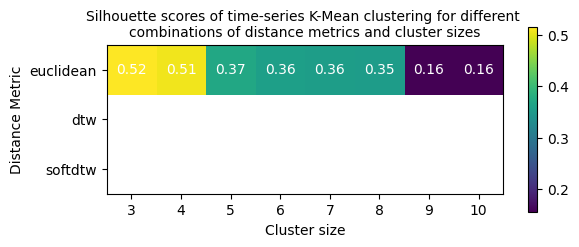

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(np.array(silhouette_scores, dtype=float))
cbar = ax.figure.colorbar(im, ax = ax, shrink=0.5)
ax.set_xticks(np.arange(8), labels=[i for i in range(3,11)])
ax.set_yticks(np.arange(len(metrics)), labels=metrics)

# Create text notation
for i in range(len(metrics)):
  for j in range(8):
    text = ax.text(j, i, round(silhouette_scores.loc[metrics[i], j+3], 2), 
                   ha="center", va="center", color="w")
ax.set_xlabel('Cluster size')
ax.set_ylabel('Distance Metric')
ax.set_title('Silhouette scores of time-series K-Mean clustering for different \ncombinations of distance metrics and cluster sizes', 
             fontsize=10)
#fig.tight_layout()
plt.savefig('sihouette_score.png')
plt.show()

The best K-means clustering model is the one with **softdtw** as distance metric and cluster size of **3**

In [ ]:
#Best K-means model(softdtw with 3 clusters)
km = TimeSeriesKMeans(n_clusters=3, metric="softdtw", random_state=170).fit(X)

In [ ]:
labels = km.labels_

In [ ]:
cluster_scores = km.transform(X)

In [ ]:
df_ts[['cluster1_score', 'cluster2_score', 'cluster3_score']] = cluster_scores

In [ ]:
df_ts[['cluster1_score', 'cluster2_score', 'cluster3_score']] = cluster_scores

In [ ]:
# based on algorithm, cluster chooses the minimum cluster score
df_ts['cluster'] = labels+1

In [ ]:
df_ts.head(3)

,USERID,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,cluster1_score,cluster2_score,cluster3_score,cluster
0,00080769b607549fe4368730bf28e30d77c6cd58a2d85e...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.000000,0.0,0.0,-101.986271,154.130496,-60.980876,1
1,003a0a5c6d2393bfaa27e53bc5b72b4c890bd3937fa9af...,1.301030,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.000000,0.0,0.0,-95.085655,13.198309,-79.992141,1
2,00abba609eb883eb82f58073d684d8fbc7cae2bf86e79c...,0.845098,0.0,0.0,0.0,0.845098,0.0,0.0,0.0,0.0,...,1.20412,0.477121,0.0,1.079181,0.0,0.0,-75.022664,4.707366,-61.610991,1


In [ ]:
# output cluster size
print('Cluster 1 Size: ', df_ts[df_ts['cluster'] == 1].shape[0])
print('Cluster 2 Size: ', df_ts[df_ts['cluster'] == 2].shape[0])
print('Cluster 3 Size: ', df_ts[df_ts['cluster'] == 3].shape[0])

Cluster 1 Size:  578
Cluster 2 Size:  99
Cluster 3 Size:  168


In [ ]:
#df_ts.to_csv('clustering_result.csv', index=False)

## One-way Anova Test

Perform an one-way Anova test to test if three clusters are different

In [ ]:
import scipy.stats as stats

In [ ]:
cluster1 = df_ts[df_ts['cluster'] == 1].iloc[:, 0:62]
cluster2 = df_ts[df_ts['cluster'] == 2].iloc[:, 0:62]
cluster3 = df_ts[df_ts['cluster'] == 3].iloc[:, 0:62]

In [ ]:
A = pd.melt(cluster1, id_vars='USERID', var_name='time_period', value_name='user_score')
B = pd.melt(cluster2, id_vars='USERID', var_name='time_period', value_name='user_score')
C = pd.melt(cluster3, id_vars='USERID', var_name='time_period', value_name='user_score')

In [ ]:
# perfom one-way ANOVA
f_value, p_value = stats.f_oneway(A['user_score'], B['user_score'], C['user_score'])

print("F-value:", f_value)
print("p-value:", p_value)


## User score, Frequency, and Wideness Trend Visualization by Clusters

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_id = '18iA3lE8laNGa27TyRZcwm-7q-SAcilRB'
download = drive.CreateFile({'id': file_id})
# Download the file to a local disc
download.GetContentFile('df_p7.csv')
df_p7 = pd.read_csv('df_p7.csv')
df_p7.head(3)

,USERID,PERIOD,FREQUENCY,AGG_TOOL_NUMBER,UNIQUE_HOURS_RUN,TOOL_COUNT,TOTAL_RUNS,AVG_HOURLY_RUN,DEEP_USER_SCORE,DEEP_USER_SCORE_LOG
0,00080769b607549fe4368730bf28e30d77c6cd58a2d85e...,1,1,1,2.000000,4.000000,4.0,2.000000,1,0.00000
1,00080769b607549fe4368730bf28e30d77c6cd58a2d85e...,2,1,1,1.000000,1.000000,1.0,1.000000,1,0.00000
2,003a0a5c6d2393bfaa27e53bc5b72b4c890bd3937fa9af...,1,2,10,1.384615,5.307692,3.0,1.769231,20,1.30103


In [ ]:
file_id = '1iEZWSBgzjfpxmIadaY46FyLzvCYA6fS6'
download = drive.CreateFile({'id': file_id})
# Download the file to a local disc
download.GetContentFile('clustering_result.csv')
df_ts = pd.read_csv('clustering_result.csv')
df_ts.head(3)

In [ ]:
# filter dataframe to get userid in the different cluster
user_cluster1 = list(df_ts[df_ts['cluster'] == 1]['USERID']) # this is a list to store userids which are in cluster 1
user_cluster2 = list(df_ts[df_ts['cluster'] == 2]['USERID'])
user_cluster3 = list(df_ts[df_ts['cluster'] == 3]['USERID'])

In [ ]:
# filter df_p7 to get data of userids in the different cluster 
df_p7_cluster1 = df_p7[df_p7['USERID'].isin(user_cluster1)].reset_index(drop=True)
df_p7_cluster2 = df_p7[df_p7['USERID'].isin(user_cluster2)].reset_index(drop=True)
df_p7_cluster3 = df_p7[df_p7['USERID'].isin(user_cluster3)].reset_index(drop=True)

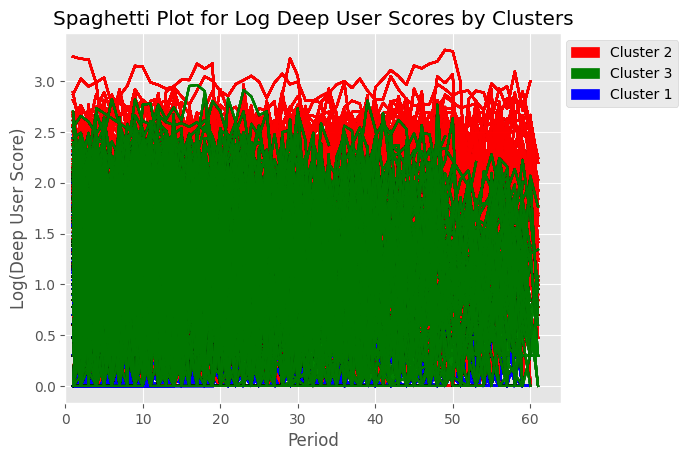

In [ ]:
# visualization for clusters
plt.style.use('ggplot')

for id in user_cluster1:
  X = df_p7_cluster1.loc[df_p7_cluster1['USERID']==id, 'PERIOD']
  Y = df_p7_cluster1.loc[df_p7_cluster1['USERID']==id, 'DEEP_USER_SCORE_LOG']
  plt.plot(X, Y, color='blue', alpha=0.4, label='Cluster1')

for id in user_cluster2:
  X = df_p7_cluster2.loc[df_p7_cluster2['USERID']==id, 'PERIOD']
  Y = df_p7_cluster2.loc[df_p7_cluster2['USERID']==id, 'DEEP_USER_SCORE_LOG']
  plt.plot(X, Y, color='red', alpha=0.4, label='Cluster2')

for id in user_cluster3:
  X = df_p7_cluster3.loc[df_p7_cluster3['USERID']==id, 'PERIOD']
  Y = df_p7_cluster3.loc[df_p7_cluster3['USERID']==id, 'DEEP_USER_SCORE_LOG']
  plt.plot(X, Y, color='green', alpha=0.1, label='Cluster3')


# Creating legend with color box
blue = mpatches.Patch(color='blue', label='Cluster 1')
red = mpatches.Patch(color='red', label='Cluster 2')
green = mpatches.Patch(color='green', label='Cluster 3')
plt.legend(handles=[red, green, blue], bbox_to_anchor=(1.25, 1))

plt.xlim(left=0)
plt.xlabel('Period')
plt.ylabel('Log(Deep User Score)')
plt.title('Spaghetti Plot for Log Deep User Scores by Clusters')
plt.show()

In [ ]:
df_mean1 = df_p7_cluster1.groupby('PERIOD')['DEEP_USER_SCORE_LOG'].mean().reset_index(name='Mean_Score')
df_mean2 = df_p7_cluster2.groupby('PERIOD')['DEEP_USER_SCORE_LOG'].mean().reset_index(name='Mean_Score')
df_mean3 = df_p7_cluster3.groupby('PERIOD')['DEEP_USER_SCORE_LOG'].mean().reset_index(name='Mean_Score')

df_mid1 = df_p7_cluster1.groupby('PERIOD')['DEEP_USER_SCORE_LOG'].median().reset_index(name='Median_Score')
df_mid2 = df_p7_cluster2.groupby('PERIOD')['DEEP_USER_SCORE_LOG'].median().reset_index(name='Median_Score')
df_mid3 = df_p7_cluster3.groupby('PERIOD')['DEEP_USER_SCORE_LOG'].median().reset_index(name='Median_Score')

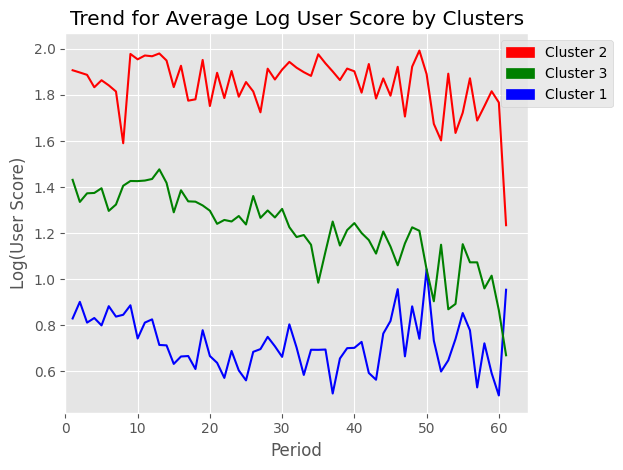

In [ ]:
# Mean Log User score
plt.style.use('ggplot')

X = df_mean1['PERIOD']
Y = df_mean1['Mean_Score']
plt.plot(X, Y, color='blue')

X = df_mean2['PERIOD']
Y = df_mean2['Mean_Score']
plt.plot(X, Y, color='red')

X = df_mean3['PERIOD']
Y = df_mean3['Mean_Score']
plt.plot(X, Y, color='green')

# Creating legend with color box
blue = mpatches.Patch(color='blue', label='Cluster 1')
red = mpatches.Patch(color='red', label='Cluster 2')
green = mpatches.Patch(color='green', label='Cluster 3')
plt.legend(handles=[red, green, blue], loc='upper right', bbox_to_anchor=(1.2, 1),
           frameon=True)

plt.xlim(left=0)
plt.xlabel('Period')
plt.ylabel('Log(User Score)')
plt.title('Trend for Average Log User Score by Clusters')
plt.tight_layout()
#plt.savefig('trend_user_score.png')
plt.show()

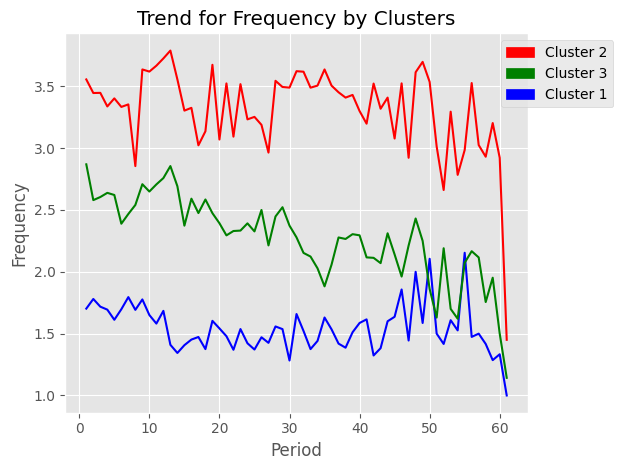

In [ ]:
# Trend of Frequency
fig, ax = plt.subplots()
sns.lineplot(data=df_p7_cluster1, x='PERIOD', y='FREQUENCY', ax=ax, color='blue', errorbar=None)
sns.lineplot(data=df_p7_cluster2, x='PERIOD', y='FREQUENCY', ax=ax, color='red', errorbar=None)
sns.lineplot(data=df_p7_cluster3, x='PERIOD', y='FREQUENCY', ax=ax, color='green', errorbar=None)
# Creating legend with color box
blue = mpatches.Patch(color='blue', label='Cluster 1')
red = mpatches.Patch(color='red', label='Cluster 2')
green = mpatches.Patch(color='green', label='Cluster 3')
plt.legend(handles=[red, green, blue], loc='upper right', bbox_to_anchor=(1.2, 1),
           frameon=True)
plt.xlabel('Period')
plt.ylabel('Frequency')
plt.title('Trend for Frequency by Clusters')
plt.tight_layout()
plt.savefig('trend_freq.png')

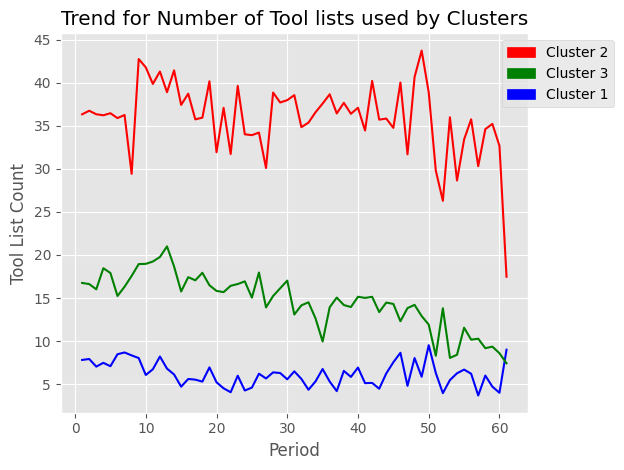

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(data=df_p7_cluster1, x='PERIOD', y='AGG_TOOL_NUMBER', ax=ax, color='blue', errorbar=None)
sns.lineplot(data=df_p7_cluster2, x='PERIOD', y='AGG_TOOL_NUMBER', ax=ax, color='red', errorbar=None)
sns.lineplot(data=df_p7_cluster3, x='PERIOD', y='AGG_TOOL_NUMBER', ax=ax, color='green', errorbar=None)
# Creating legend with color box
blue = mpatches.Patch(color='blue', label='Cluster 1')
red = mpatches.Patch(color='red', label='Cluster 2')
green = mpatches.Patch(color='green', label='Cluster 3')
plt.legend(handles=[red, green, blue], loc='upper right', bbox_to_anchor=(1.2, 1),
           frameon=True)
plt.xlabel('Period')
plt.ylabel('Tool List Count')
plt.title('Trend for Number of Tool lists used by Clusters')
plt.tight_layout()
plt.savefig('trend_tool.png')

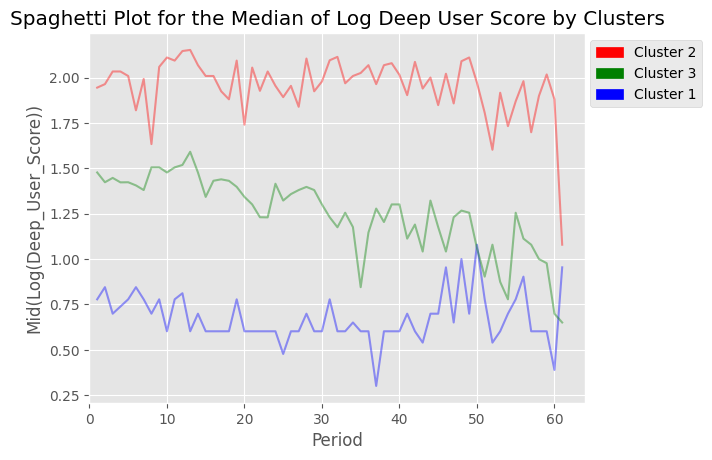

In [ ]:
# Median Log User Score
X = df_mid1['PERIOD']
Y = df_mid1['Median_Score']
plt.plot(X, Y, color='blue', alpha=0.4)

X = df_mid2['PERIOD']
Y = df_mid2['Median_Score']
plt.plot(X, Y, color='red', alpha=0.4)

X = df_mid3['PERIOD']
Y = df_mid3['Median_Score']
plt.plot(X, Y, color='green', alpha=0.4)

# Creating legend with color box
blue = mpatches.Patch(color='blue', label='Cluster 1')
red = mpatches.Patch(color='red', label='Cluster 2')
green = mpatches.Patch(color='green', label='Cluster 3')
plt.legend(handles=[blue, red, green])

# Creating legend with color box
blue = mpatches.Patch(color='blue', label='Cluster 1')
red = mpatches.Patch(color='red', label='Cluster 2')
green = mpatches.Patch(color='green', label='Cluster 3')
plt.legend(handles=[red, green, blue], loc='upper right', bbox_to_anchor=(1.25, 1))

plt.xlim(left=0)
plt.xlabel('Period')
plt.ylabel('Mid(Log(Deep_User_Score))')
plt.title('Spaghetti Plot for the Median of Log Deep User Score by Clusters')
plt.show()

## Other Numeric Variables Trend Visualization by Clusters

In [ ]:
# Average hourly run
df_AVG_HOURLY_RUN_mean1 = df_p7_cluster1.groupby('PERIOD')['AVG_HOURLY_RUN'].mean().reset_index(name='AVG_HOURLY_RUN')
df_AVG_HOURLY_RUN_mean2 = df_p7_cluster2.groupby('PERIOD')['AVG_HOURLY_RUN'].mean().reset_index(name='AVG_HOURLY_RUN')
df_AVG_HOURLY_RUN_mean3 = df_p7_cluster3.groupby('PERIOD')['AVG_HOURLY_RUN'].mean().reset_index(name='AVG_HOURLY_RUN')

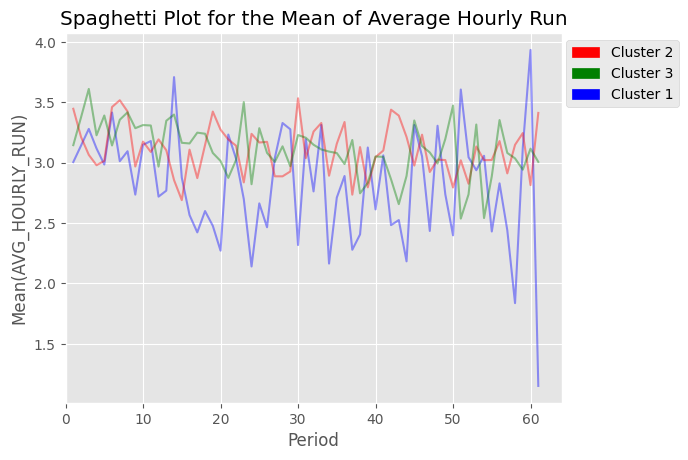

In [ ]:
# Mean AVG_HOURLY_RUN
X = df_AVG_HOURLY_RUN_mean1['PERIOD']
Y = df_AVG_HOURLY_RUN_mean1['AVG_HOURLY_RUN']
plt.plot(X, Y, color='blue')

X = df_AVG_HOURLY_RUN_mean2['PERIOD']
Y = df_AVG_HOURLY_RUN_mean2['AVG_HOURLY_RUN']
plt.plot(X, Y, color='red')

X = df_AVG_HOURLY_RUN_mean3['PERIOD']
Y = df_AVG_HOURLY_RUN_mean3['AVG_HOURLY_RUN']
plt.plot(X, Y, color='green')

# Creating legend with color box
blue = mpatches.Patch(color='blue', label='Cluster 1')
red = mpatches.Patch(color='red', label='Cluster 2')
green = mpatches.Patch(color='green', label='Cluster 3')
plt.legend(handles=[blue, red, green])

# Creating legend with color box
blue = mpatches.Patch(color='blue', label='Cluster 1')
red = mpatches.Patch(color='red', label='Cluster 2')
green = mpatches.Patch(color='green', label='Cluster 3')
plt.legend(handles=[red, green, blue], loc='upper right', bbox_to_anchor=(1.25, 1))

plt.xlim(left=0)
plt.xlabel('Period')
plt.ylabel('Mean(AVG_HOURLY_RUN)')
plt.title('Spaghetti Plot for the Mean of Average Hourly Run')
plt.show()

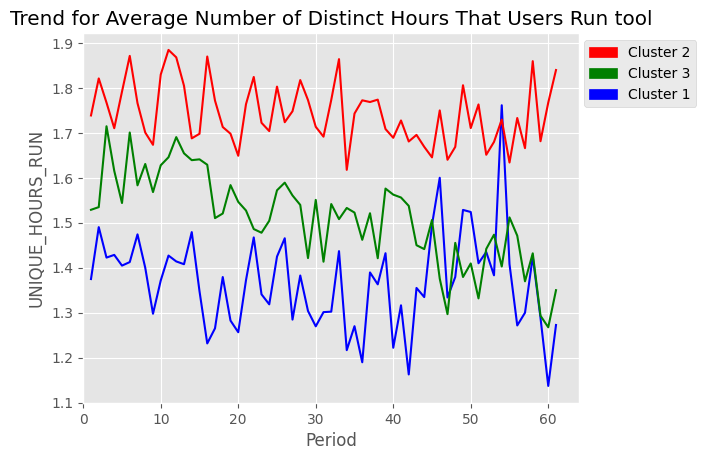

In [ ]:
#UNIQUE HOUR RUN
X = df_p7_cluster1.groupby('PERIOD')['UNIQUE_HOURS_RUN'].mean().reset_index(name='UNIQUE_HOURS_RUN')['PERIOD']
Y = df_p7_cluster1.groupby('PERIOD')['UNIQUE_HOURS_RUN'].mean().reset_index(name='UNIQUE_HOURS_RUN')['UNIQUE_HOURS_RUN']
plt.plot(X, Y, color='blue')

X = df_p7_cluster2.groupby('PERIOD')['UNIQUE_HOURS_RUN'].mean().reset_index(name='UNIQUE_HOURS_RUN')['PERIOD']
Y = df_p7_cluster2.groupby('PERIOD')['UNIQUE_HOURS_RUN'].mean().reset_index(name='UNIQUE_HOURS_RUN')['UNIQUE_HOURS_RUN']
plt.plot(X, Y, color='red')

X = df_p7_cluster3.groupby('PERIOD')['UNIQUE_HOURS_RUN'].mean().reset_index(name='UNIQUE_HOURS_RUN')['PERIOD']
Y = df_p7_cluster3.groupby('PERIOD')['UNIQUE_HOURS_RUN'].mean().reset_index(name='UNIQUE_HOURS_RUN')['UNIQUE_HOURS_RUN']
plt.plot(X, Y, color='green')

# Creating legend with color box
blue = mpatches.Patch(color='blue', label='Cluster 1')
red = mpatches.Patch(color='red', label='Cluster 2')
green = mpatches.Patch(color='green', label='Cluster 3')
plt.legend(handles=[blue, red, green])

# Creating legend with color box
blue = mpatches.Patch(color='blue', label='Cluster 1')
red = mpatches.Patch(color='red', label='Cluster 2')
green = mpatches.Patch(color='green', label='Cluster 3')
plt.legend(handles=[red, green, blue], loc='upper right', bbox_to_anchor=(1.25, 1))

plt.xlim(left=0)
plt.xlabel('Period')
plt.ylabel('UNIQUE_HOURS_RUN')
plt.title('Trend for Average Number of Distinct Hours That Users Run tool')
plt.show()

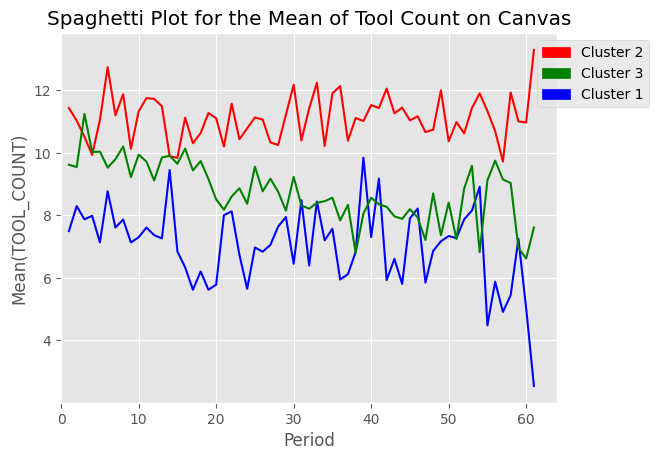

In [ ]:
#TOOL_COUNT
X = df_p7_cluster1.groupby('PERIOD')['TOOL_COUNT'].mean().reset_index(name='TOOL_COUNT')['PERIOD']
Y = df_p7_cluster1.groupby('PERIOD')['TOOL_COUNT'].mean().reset_index(name='TOOL_COUNT')['TOOL_COUNT']
plt.plot(X, Y, color='blue')

X = df_p7_cluster2.groupby('PERIOD')['TOOL_COUNT'].mean().reset_index(name='TOOL_COUNT')['PERIOD']
Y = df_p7_cluster2.groupby('PERIOD')['TOOL_COUNT'].mean().reset_index(name='TOOL_COUNT')['TOOL_COUNT']
plt.plot(X, Y, color='red')

X = df_p7_cluster3.groupby('PERIOD')['TOOL_COUNT'].mean().reset_index(name='TOOL_COUNT')['PERIOD']
Y = df_p7_cluster3.groupby('PERIOD')['TOOL_COUNT'].mean().reset_index(name='TOOL_COUNT')['TOOL_COUNT']
plt.plot(X, Y, color='green')

# Creating legend with color box
blue = mpatches.Patch(color='blue', label='Cluster 1')
red = mpatches.Patch(color='red', label='Cluster 2')
green = mpatches.Patch(color='green', label='Cluster 3')
plt.legend(handles=[blue, red, green])

# Creating legend with color box
blue = mpatches.Patch(color='blue', label='Cluster 1')
red = mpatches.Patch(color='red', label='Cluster 2')
green = mpatches.Patch(color='green', label='Cluster 3')
plt.legend(handles=[red, green, blue], loc='upper right', bbox_to_anchor=(1.2, 1),
           frameon=True)

plt.xlim(left=0)
plt.xlabel('Period')
plt.ylabel('Mean(TOOL_COUNT)')
plt.title('Spaghetti Plot for the Mean of Tool Count on Canvas')
plt.show()

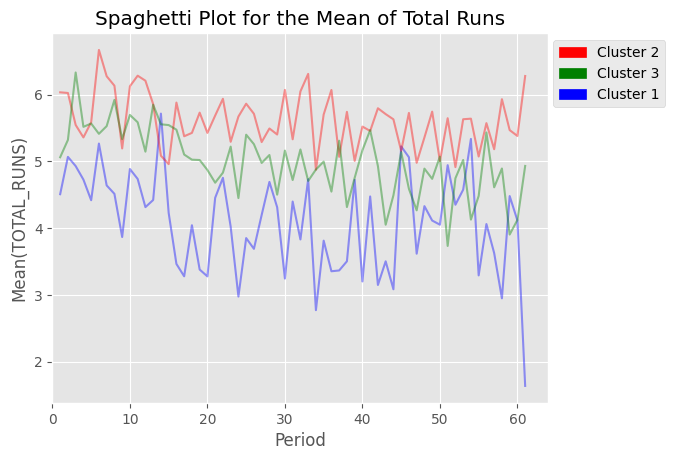

In [ ]:
#TOTAL_RUNS
X = df_p7_cluster1.groupby('PERIOD')['TOTAL_RUNS'].mean().reset_index(name='TOTAL_RUNS')['PERIOD']
Y = df_p7_cluster1.groupby('PERIOD')['TOTAL_RUNS'].mean().reset_index(name='TOTAL_RUNS')['TOTAL_RUNS']
plt.plot(X, Y, color='blue')

X = df_p7_cluster2.groupby('PERIOD')['TOTAL_RUNS'].mean().reset_index(name='TOTAL_RUNS')['PERIOD']
Y = df_p7_cluster2.groupby('PERIOD')['TOTAL_RUNS'].mean().reset_index(name='TOTAL_RUNS')['TOTAL_RUNS']
plt.plot(X, Y, color='red')

X = df_p7_cluster3.groupby('PERIOD')['TOTAL_RUNS'].mean().reset_index(name='TOTAL_RUNS')['PERIOD']
Y = df_p7_cluster3.groupby('PERIOD')['TOTAL_RUNS'].mean().reset_index(name='TOTAL_RUNS')['TOTAL_RUNS']
plt.plot(X, Y, color='green')

# Creating legend with color box
blue = mpatches.Patch(color='blue', label='Cluster 1')
red = mpatches.Patch(color='red', label='Cluster 2')
green = mpatches.Patch(color='green', label='Cluster 3')
plt.legend(handles=[blue, red, green])

# Creating legend with color box
blue = mpatches.Patch(color='blue', label='Cluster 1')
red = mpatches.Patch(color='red', label='Cluster 2')
green = mpatches.Patch(color='green', label='Cluster 3')
plt.legend(handles=[red, green, blue], loc='upper right', bbox_to_anchor=(1.25, 1))

plt.xlim(left=0)
plt.xlabel('Period')
plt.ylabel('Mean(TOTAL_RUNS)')
plt.title('Spaghetti Plot for the Mean of Total Runs')
plt.show()

# Tool usage analysis

## Overall tool usages in three clusters

In [ ]:
file_id = '1a6fj3u8eECkba_MTgh289G8wA86c5ViE'
download = drive.CreateFile({'id': file_id})
download.GetContentFile('df_tool_list.csv')
df_tool_lst = pd.read_csv('df_tool_list.csv')
df_tool_lst.head(3)

,USERID,RUN_DATE,UNIQUE_TOOL_NUMBER,TOOL_LIST,AGG_TOOL_NUMBER,Period_5,Period_7
0,00080769b607549fe4368730bf28e30d77c6cd58a2d85e...,2022-09-22,2,"Browse, Input Data",1,1,1
1,00080769b607549fe4368730bf28e30d77c6cd58a2d85e...,2022-10-03,2,"Browse, Input Data",1,3,2
2,003a0a5c6d2393bfaa27e53bc5b72b4c890bd3937fa9af...,2022-09-22,8,"Python, Output Data, Text Input, Action, Check...",7,1,1


In [ ]:
user_c1 = df_ts.loc[df_ts['cluster'] == 1, 'USERID']
user_c2 = df_ts.loc[df_ts['cluster'] == 2, 'USERID']
user_c3 = df_ts.loc[df_ts['cluster'] == 3, 'USERID']
top_tool1 = df_tool_lst.loc[df_tool_lst['USERID'].isin(user_c1), 'TOOL_LIST'].value_counts().reset_index(name='freq').head(10)
top_tool2 = df_tool_lst.loc[df_tool_lst['USERID'].isin(user_c2), 'TOOL_LIST'].value_counts().reset_index(name='freq').head(10)
top_tool3 = df_tool_lst.loc[df_tool_lst['USERID'].isin(user_c3), 'TOOL_LIST'].value_counts().reset_index(name='freq').head(10)

In [ ]:
# Print the top 10 tool lists for cluster 1
'Input Data' in [t for t in top_tool2['index'].to_list() if t not in top_tool1['index'].to_list() and t not in top_tool3['index'].to_list()]

False

<ipython-input-130-3b54e82090bb>:26: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


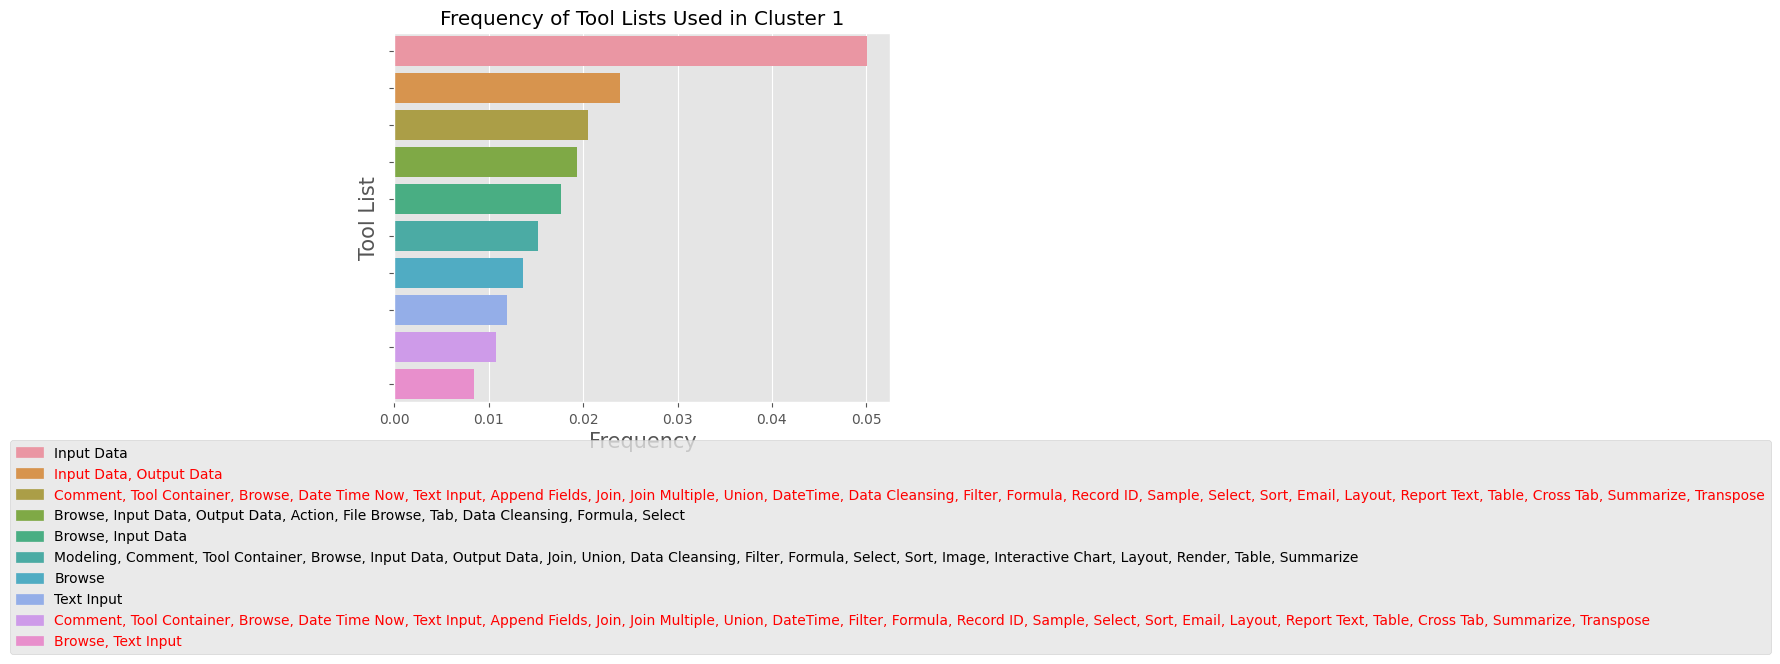

In [ ]:
unique_lst = [t for t in top_tool1['index'].to_list() if t not in top_tool2['index'].to_list() and t not in top_tool3['index'].to_list()]
temp = df_tool_lst.loc[df_tool_lst['USERID'].isin(user_c1), 'TOOL_LIST'].value_counts().reset_index(name='freq').head(10)
size = df_tool_lst.loc[df_tool_lst['USERID'].isin(user_c1)].shape[0]
temp['freq'] = temp['freq']/size


all_labels = top_tool1["index"].to_list() # replace with all tool lists
all_colors = ["lightcoral", "coral", "orange", "gold", "lemonchiffon", "palegreen", "turquoise", "lightskyblue", "cornflowerblue", "mediumpurple"] # replace with all colors

fig,ax = plt.subplots(figsize=(33,10))
sns.barplot(data=temp, y='index', x='freq', palette = all_colors)
ax.set(yticklabels=["■"]* 10)  
ax.set(ylabel=None)
ax.tick_params(bottom=False)

text_colors = []
colors = dict(zip(all_labels, all_colors))
labels = list(colors.keys())
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[label]) for label in labels]

for t in temp['index']:
  c = 'red' if t in unique_lst else 'black'
  text_colors.append(c)


for ticklabel, tickcolor in zip(plt.gca().get_yticklabels(), all_colors):
    ticklabel.set_color(tickcolor)
legend = plt.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.6), fancybox=True, fontsize=15)
for i, text in enumerate(legend.get_texts()):
  text.set_color(text_colors[i])
plt.xlabel('Percentage of Usage',fontsize=20)
plt.ylabel('Tool List',fontsize=20)
plt.title('Frequency of Tool List Used in Cluster 1', fontsize=20)
plt.show()

<ipython-input-132-a0dc5854d276>:26: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


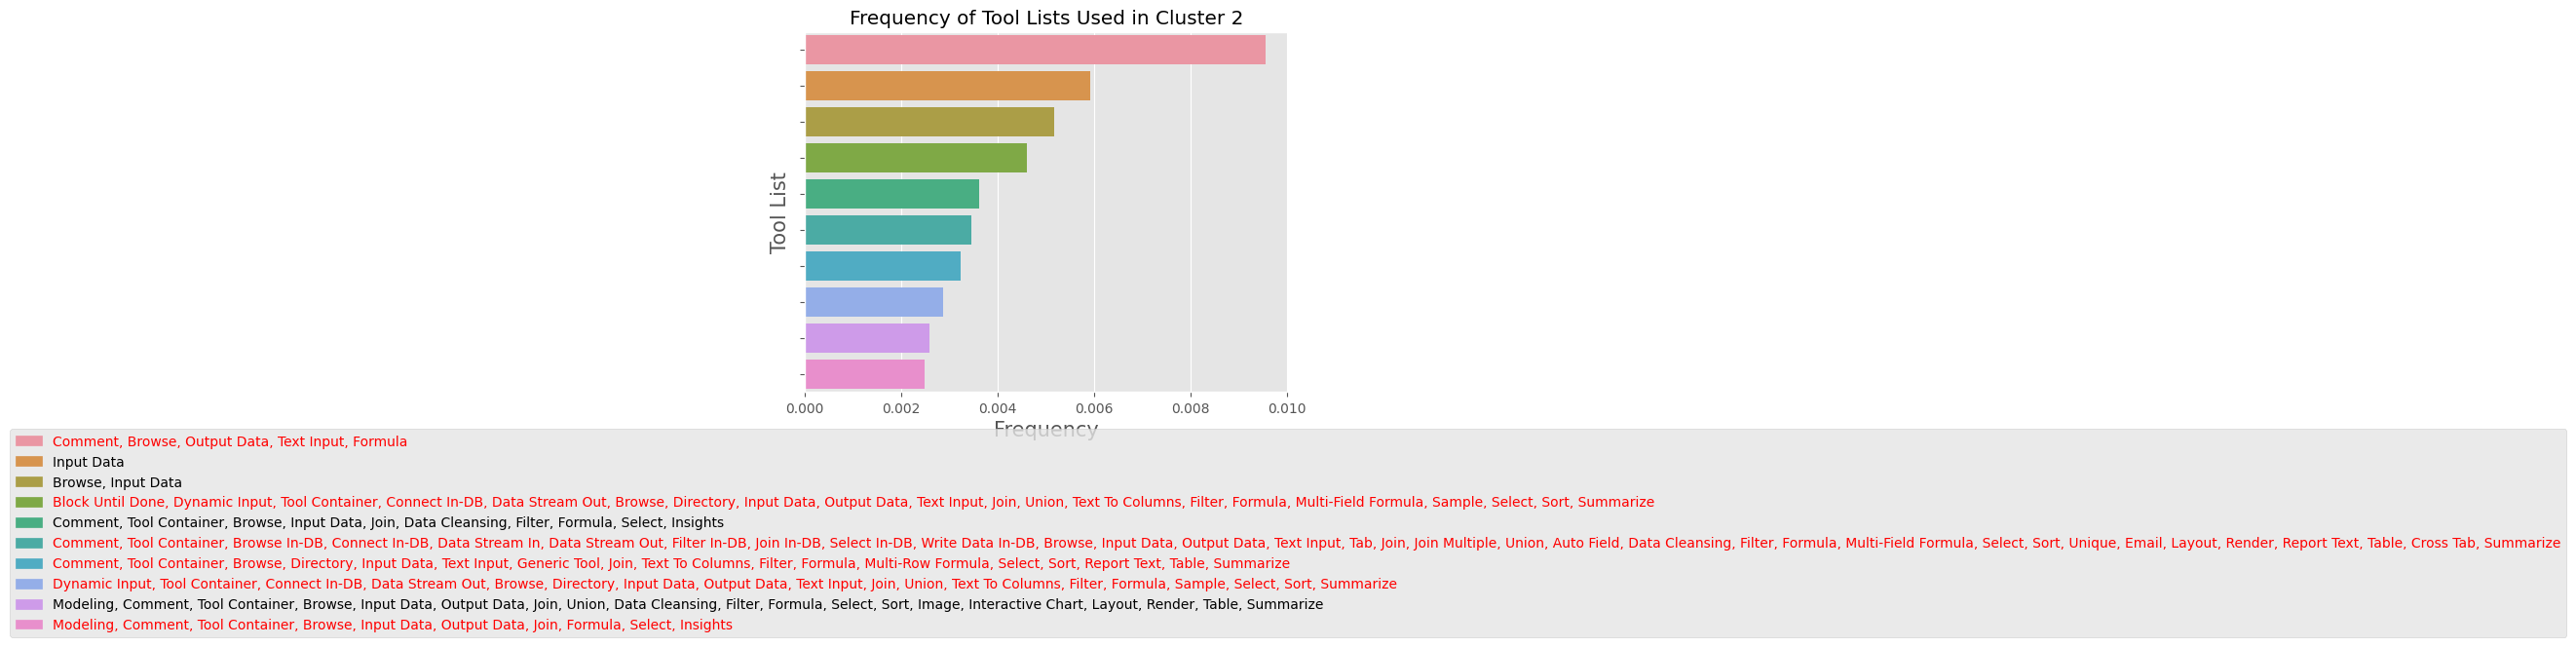

In [ ]:
unique_lst = [t for t in top_tool2['index'].to_list() if t not in top_tool1['index'].to_list() and t not in top_tool3['index'].to_list()]
temp = df_tool_lst.loc[df_tool_lst['USERID'].isin(user_c2), 'TOOL_LIST'].value_counts().reset_index(name='freq').head(10)
size = df_tool_lst.loc[df_tool_lst['USERID'].isin(user_c2)].shape[0]
temp['freq'] = temp['freq']/size


all_labels = top_tool2["index"].to_list() # replace with all tool lists
all_colors = ["lightcoral", "coral", "orange", "gold", "lemonchiffon", "palegreen", "turquoise", "lightskyblue", "cornflowerblue", "mediumpurple"] # replace with all colors

fig,ax = plt.subplots(figsize=(22,6))
sns.barplot(data=temp, y='index', x='freq', palette = all_colors)
ax.set(yticklabels=["■"]* 10)  
ax.set(ylabel=None)
ax.tick_params(bottom=False)

text_colors = []
colors = dict(zip(all_labels, all_colors))
labels = list(colors.keys())
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[label]) for label in labels]

for t in temp['index']:
  c = 'red' if t in unique_lst else 'black'
  text_colors.append(c)


for ticklabel, tickcolor in zip(plt.gca().get_yticklabels(), all_colors):
    ticklabel.set_color(tickcolor)
legend = plt.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -1.2), fancybox=True, fontsize=20)
for i, text in enumerate(legend.get_texts()):
  text.set_color(text_colors[i])
plt.xlabel('Percentage of Usage')
plt.ylabel('Tool List')
plt.title('Frequency of Tool List Used in Cluster 2', fontsize=15)
plt.show()

<ipython-input-133-cc95677d16d0>:26: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


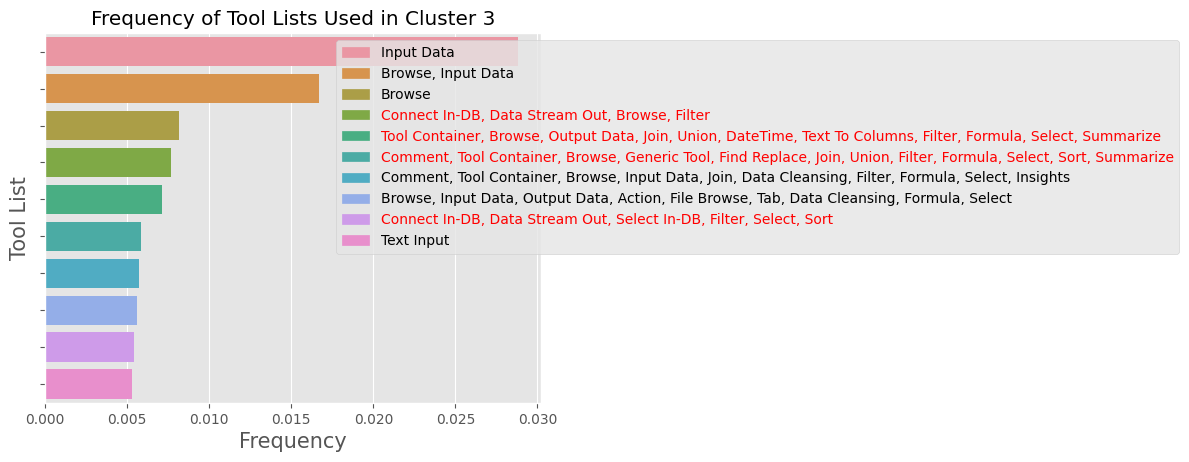

In [ ]:
unique_lst = [t for t in top_tool3['index'].to_list() if t not in top_tool1['index'].to_list() and t not in top_tool2['index'].to_list()]
temp = df_tool_lst.loc[df_tool_lst['USERID'].isin(user_c3), 'TOOL_LIST'].value_counts().reset_index(name='freq').head(10)
size = df_tool_lst.loc[df_tool_lst['USERID'].isin(user_c3)].shape[0]
temp['freq'] = temp['freq']/size


all_labels = top_tool3["index"].to_list() # replace with all tool lists
all_colors = ["lightcoral", "coral", "orange", "gold", "lemonchiffon", "palegreen", "turquoise", "lightskyblue", "cornflowerblue", "mediumpurple"] # replace with all colors

fig,ax = plt.subplots(figsize=(20,6))
sns.barplot(data=temp, y='index', x='freq', palette = all_colors)
ax.set(yticklabels=["■"]* 10)  
ax.set(ylabel=None)
ax.tick_params(bottom=False)

text_colors = []
colors = dict(zip(all_labels, all_colors))
labels = list(colors.keys())
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[label]) for label in labels]

for t in temp['index']:
  c = 'red' if t in unique_lst else 'black'
  text_colors.append(c)


for ticklabel, tickcolor in zip(plt.gca().get_yticklabels(), all_colors):
    ticklabel.set_color(tickcolor)
legend = plt.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.6), fancybox=True)
for i, text in enumerate(legend.get_texts()):
  text.set_color(text_colors[i])
plt.xlabel('Percentage of Usage',fontsize = 15)
plt.ylabel('Tool List',fontsize = 15)
plt.title('Frequency of Tool List Used in Cluster 3', fontsize=20)
plt.show()

## Check "Popularity" of Top Tool Lists in Each Cluster 

This section we check if some tool lists are only used by few users. We found that longer tool lists have fewer users to use and very long tool lists only have few users to use.

In [ ]:
temp_df = df_tool_lst.loc[df_tool_lst['USERID'].isin(user_c1)]

new_df = pd.DataFrame(columns=['Tool', 'Number of Users'])
# Extract unique tools from the 'tool_list' column
distinct_tools = temp_df['TOOL_LIST'].explode().unique()

# Iterate over each distinct tool
for tool in distinct_tools:
    # Find the user IDs that have the current tool
    user_ids = temp_df[temp_df['TOOL_LIST'].apply(lambda x: tool in x)]['USERID']
    
    # Append the tool and corresponding user IDs to the new dataframe
    new_df = new_df.append({'Tool': tool, 'Number of Users': len(set(user_ids.tolist()))}, ignore_index=True)

# Display the new dataframe
new_df['Percentage of users that use these tools'] = new_df['Number of Users']/len(user_c1) * 100
new_df['Percentage of users that use these tools'] = new_df['Percentage of users that use these tools'].astype(float).round(2)

In [ ]:
new_df.sort_values(by = 'Percentage of users that use these tools', ascending = False).head(10)

,Tool,Number of Users,Percentage of users that use these tools
16,Input Data,523,90.48
71,Browse,467,80.80
451,Select,454,78.55
0,"Browse, Input Data",413,71.45
469,Join,409,70.76
407,Filter,405,70.07
479,Output Data,396,68.51
69,"Input Data, Output Data",368,63.67
14,Text Input,367,63.49
965,Comment,356,61.59


In [ ]:
len(user_c1)

578

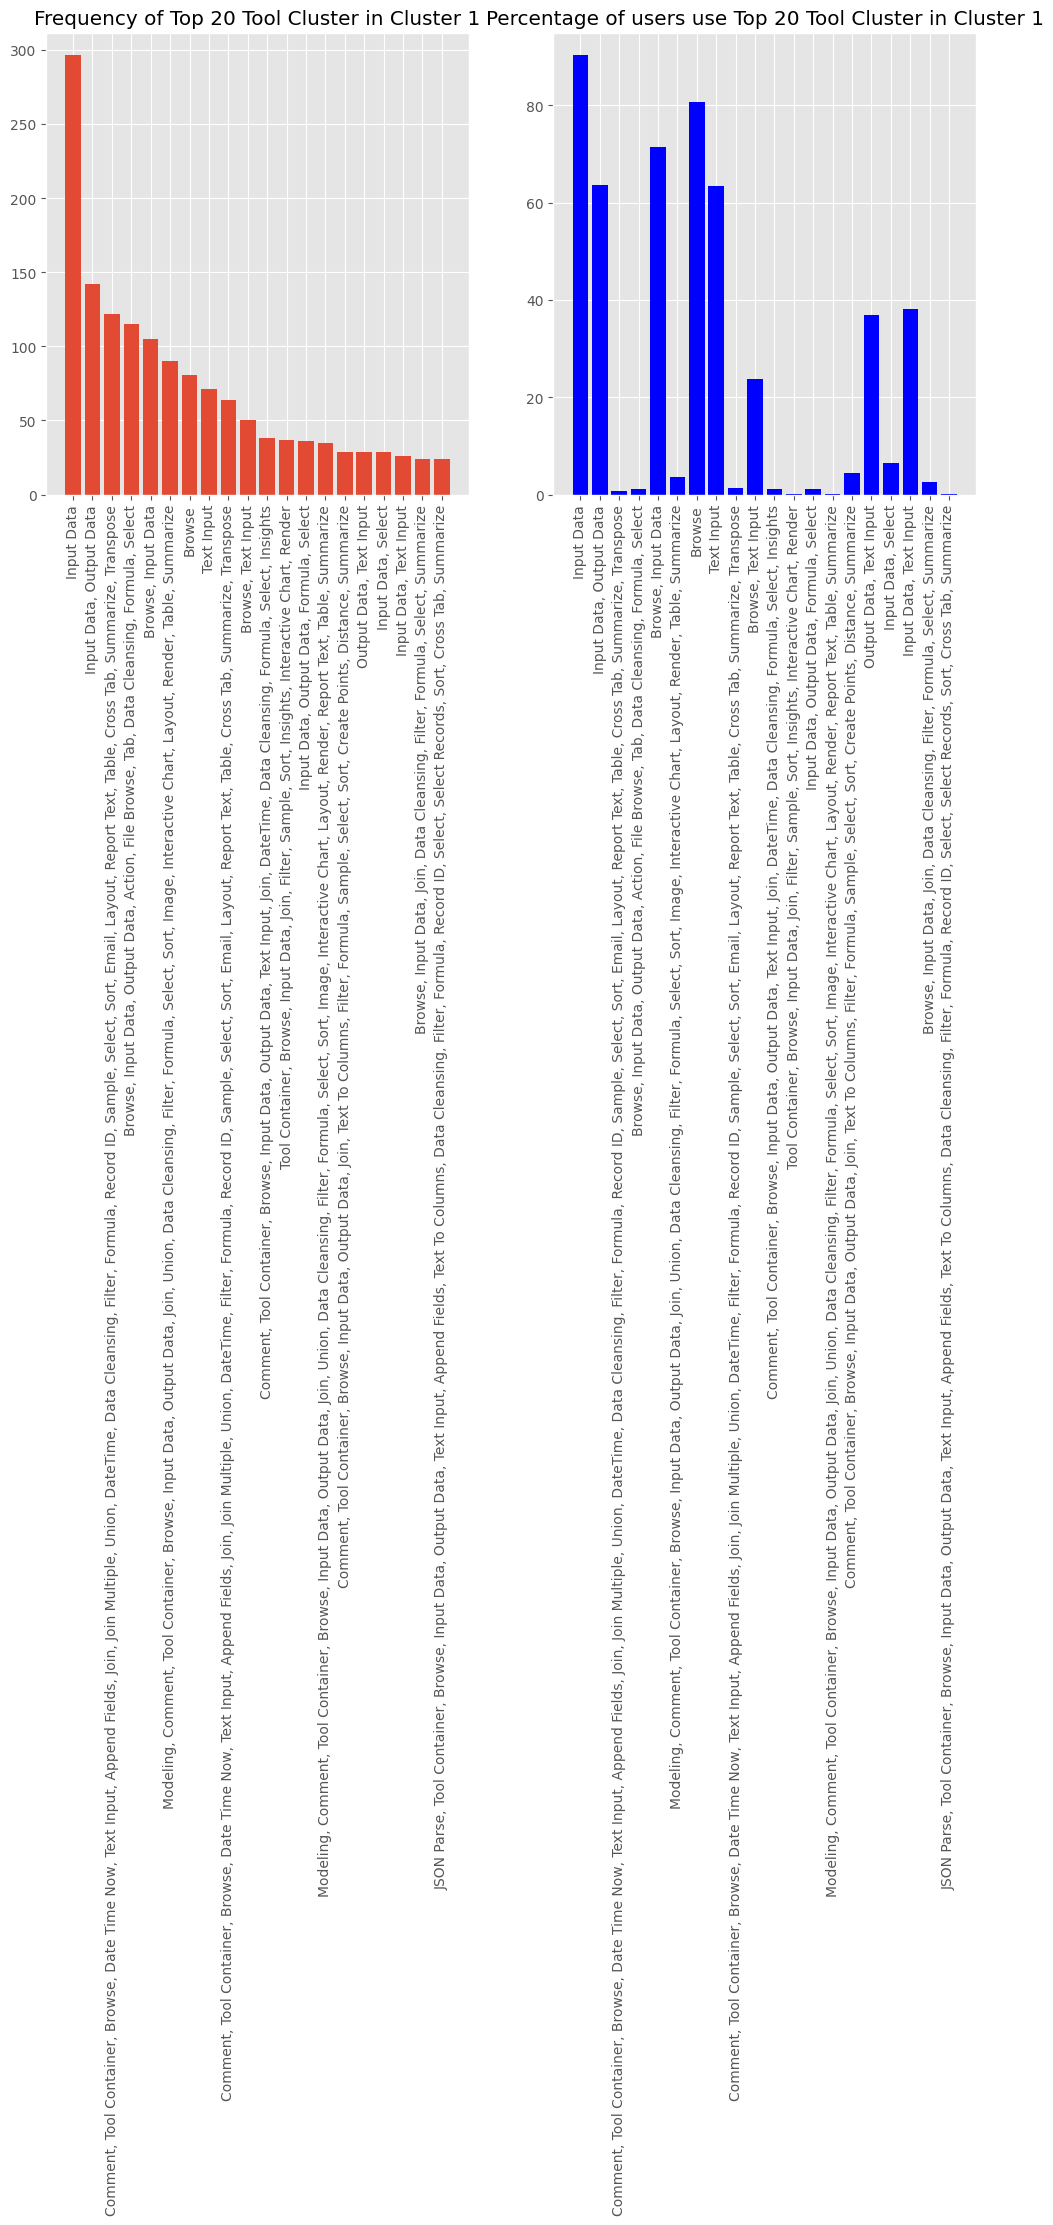

In [ ]:
x1 = cluster1_freqTool_usage['index'].to_list()
y1 = cluster1_freqTool_usage['freq'].to_list()
y2 = cluster1_freqTool_usage['Percentage of Users in Cluster1'].to_list()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

bar_width = 0.5
ax1.bar(x1, y1)
ax1.set_xticks(x1)
ax1.set_xticklabels(x1, rotation='vertical')
ax1.set_title('Frequency of Top 20 Tool Cluster in Cluster 1')

# Plot the second bar chart
ax2.bar(x1, y2, color = 'blue')
ax2.set_xticks(x1)
ax2.set_xticklabels(x1, rotation='vertical')
ax2.set_title('Percentage of users use Top 20 Tool Cluster in Cluster 1')

plt.show()


In [ ]:
total_tempc2 = df_tool_lst.loc[df_tool_lst['USERID'].isin(user_c2), 'TOOL_LIST'].value_counts().sum()
temp_df = df_tool_lst.loc[df_tool_lst['USERID'].isin(user_c2)]

new_df = pd.DataFrame(columns=['Tool', 'Number of Users'])
# Extract unique tools from the 'tool_list' column
distinct_tools = temp_df['TOOL_LIST'].explode().unique()

# Iterate over each distinct tool
for tool in distinct_tools:
    # Find the user IDs that have the current tool
    user_ids = temp_df[temp_df['TOOL_LIST'].apply(lambda x: tool in x)]['USERID']
    
    # Append the tool and corresponding user IDs to the new dataframe
    new_df = new_df.append({'Tool': tool, 'Number of Users': len(user_ids.tolist())}, ignore_index=True)

# Display the new dataframe
new_df['Percentage of users that use these tools'] = new_df['Number of Users']//len(user_c2) * 100
new_df['Percentage of users that use these tools'] = new_df['Percentage of users that use these tools'].astype(float).round(2)

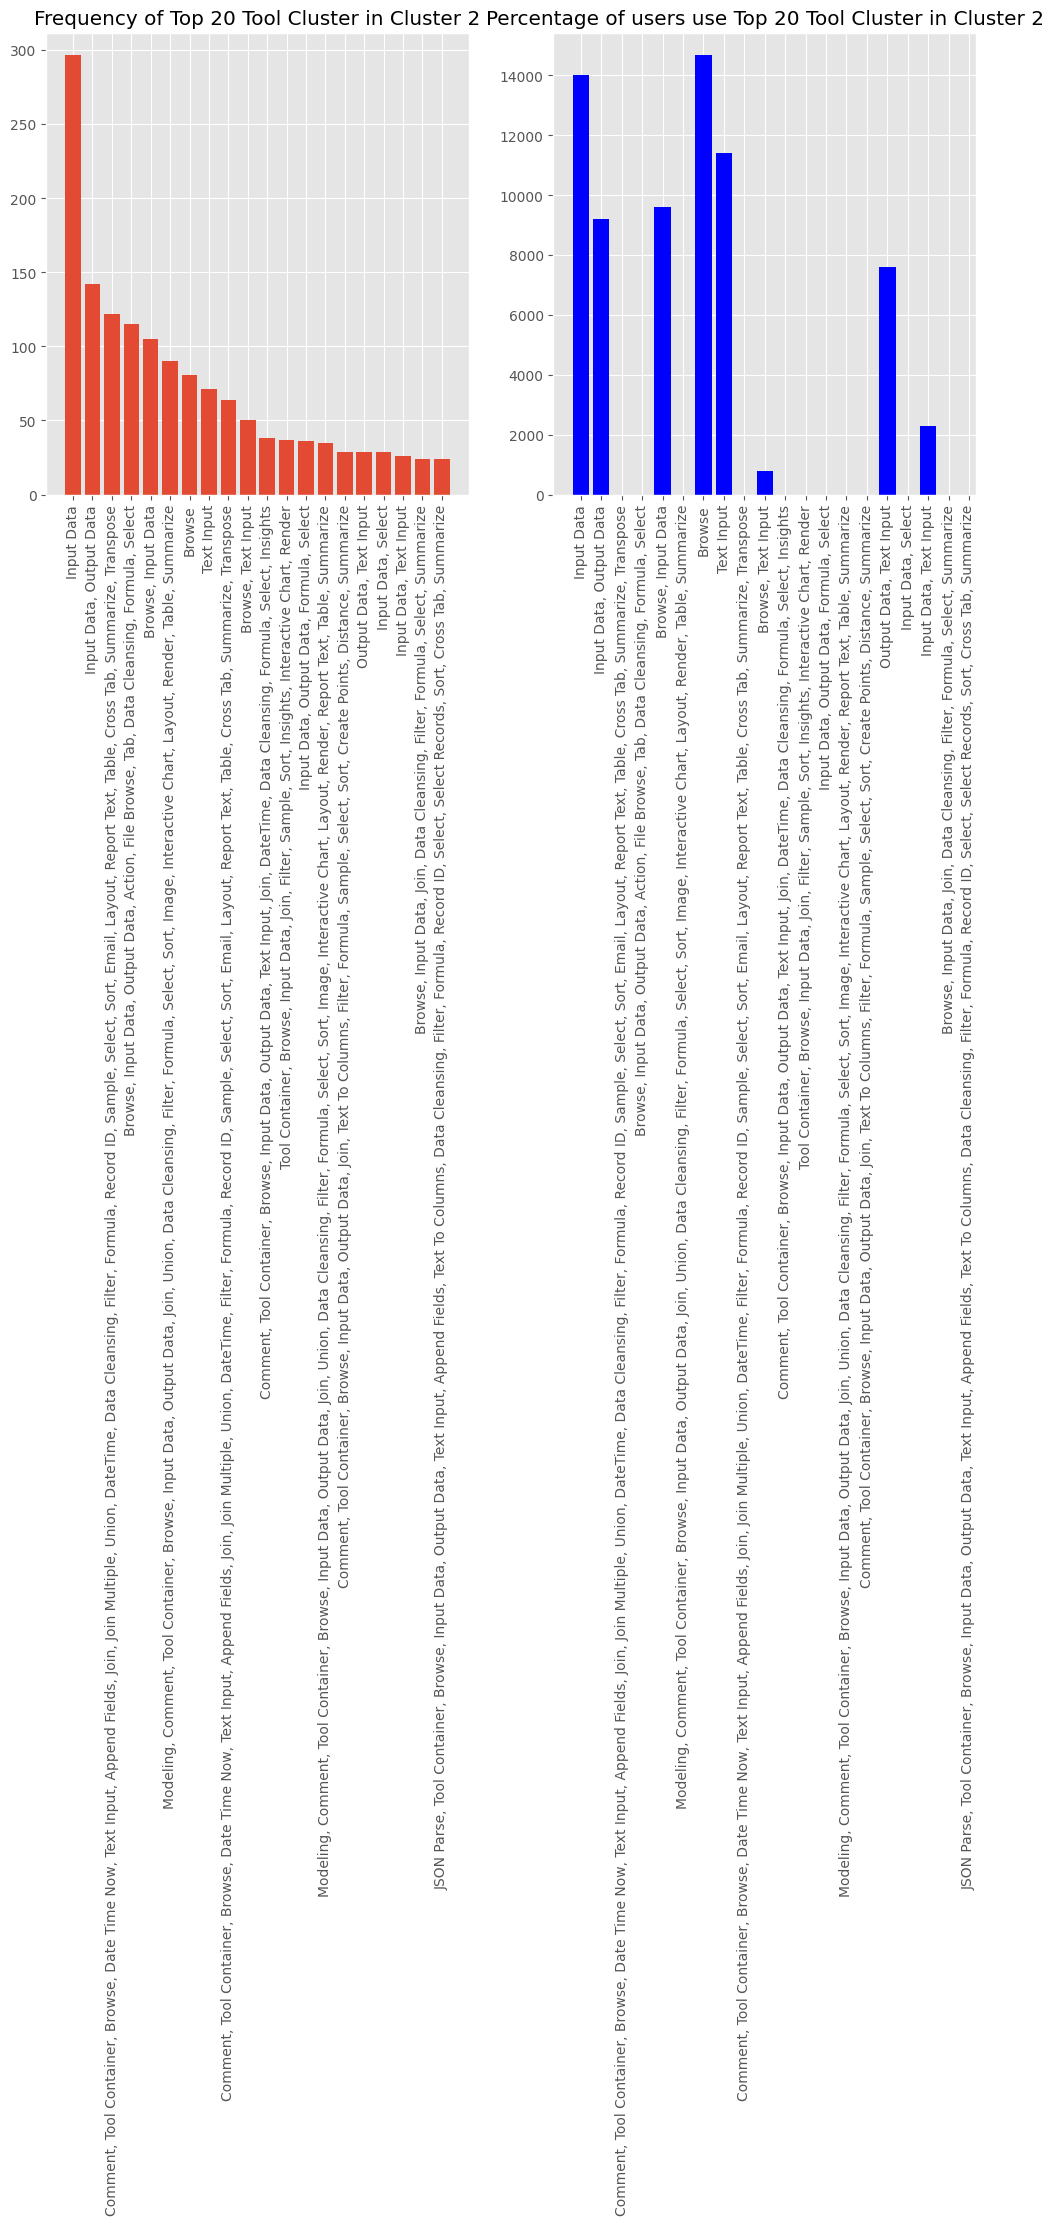

In [ ]:
x1 = cluster2_freqTool_usage['index'].to_list()
y1 = cluster2_freqTool_usage['freq'].to_list()
y2 = cluster2_freqTool_usage['Percentage of Users in Cluster2'].to_list()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

bar_width = 0.5
ax1.bar(x1, y1)
ax1.set_xticks(x1)
ax1.set_xticklabels(x1, rotation='vertical')
ax1.set_title('Frequency of Top 20 Tool Cluster in Cluster 2')

# Plot the second bar chart
ax2.bar(x1, y2, color = 'blue')
ax2.set_xticks(x1)
ax2.set_xticklabels(x1, rotation='vertical')
ax2.set_title('Percentage of users use Top 20 Tool Cluster in Cluster 2')

plt.show()

## Check Users' Contribution to Tool List Usage in Each Cluster

This section is to check if a cluster has "dominant users", which means most tool usages in that cluster are contributed by these users.

In [ ]:
x = pd.DataFrame(df_tool_lst.loc[df_tool_lst['USERID'].isin(user_c1), 'USERID']).value_counts().index.get_level_values(0).unique().tolist()
y = (pd.DataFrame(df_tool_lst.loc[df_tool_lst['USERID'].isin(user_c1), 'USERID']).value_counts() / sum(pd.DataFrame(df_tool_lst.loc[df_tool_lst['USERID'].isin(user_c1), 'USERID']).value_counts().values.tolist())).values.tolist()
plt.bar(x,y)
plt.xlabel('User')
plt.ylabel('Tool usage')
plt.title('Distribution of users tool usage in cluster 1')
plt.show()

In [ ]:
x = pd.DataFrame(df_tool_lst.loc[df_tool_lst['USERID'].isin(user_c2), 'USERID']).value_counts().index.get_level_values(0).unique().tolist()
y = (pd.DataFrame(df_tool_lst.loc[df_tool_lst['USERID'].isin(user_c2), 'USERID']).value_counts() / sum(pd.DataFrame(df_tool_lst.loc[df_tool_lst['USERID'].isin(user_c2), 'USERID']).value_counts().values.tolist())).values.tolist()
plt.bar(x,y)
plt.xlabel('User')
plt.ylabel('Tool usage')
plt.title('Distribution of users tool usage in cluster 2')
plt.show()

In [ ]:
x = pd.DataFrame(df_tool_lst.loc[df_tool_lst['USERID'].isin(user_c3), 'USERID']).value_counts().index.get_level_values(0).unique().tolist()
y = (pd.DataFrame(df_tool_lst.loc[df_tool_lst['USERID'].isin(user_c3), 'USERID']).value_counts() / sum(pd.DataFrame(df_tool_lst.loc[df_tool_lst['USERID'].isin(user_c3), 'USERID']).value_counts().values.tolist())).values.tolist()
plt.bar(x,y)
plt.xlabel('User')
plt.ylabel('Tool usage')
plt.title('Distribution of users tool usage in cluster 3')
plt.show()

## Anlysis of changes of tool usages

This section we analyze if there are changes in tool usages given the trends in user score we saw for the clusters. We are especially interested in the cluster 1.

In [ ]:
file_id = '1_Guqvz4hEUttoJ6M9_2ylqeeDaw3ANg4'
download = drive.CreateFile({'id': file_id})
# Download the file to a local disc
download.GetContentFile('20230321 UCI Capstone.csv')
df  = pd.read_csv('20230321 UCI Capstone.csv')
df.head()

,USERID,RUN_DATE,TOOL_CLASS,TOOL_NAME,UNIQUE_HOURS_RUN,TOOL_COUNT,TOTAL_RUNS
0,40924be34779db43793960c131baa2c49144f2adba22a6...,2022-01-07,Documentation,Comment,1,15,3
1,40924be34779db43793960c131baa2c49144f2adba22a6...,2022-01-07,In/Out,Browse,1,6,3
2,40924be34779db43793960c131baa2c49144f2adba22a6...,2022-01-07,In/Out,Input Data,1,6,3
3,40924be34779db43793960c131baa2c49144f2adba22a6...,2022-01-07,Preparation,Auto Field,1,3,3
4,40924be34779db43793960c131baa2c49144f2adba22a6...,2022-01-07,Preparation,Filter,1,3,3


In [ ]:
file_id = '1a6fj3u8eECkba_MTgh289G8wA86c5ViE'
download = drive.CreateFile({'id': file_id})
download.GetContentFile('df_tool_list.csv')
df_tool_lst = pd.read_csv('df_tool_list.csv')
df_tool_lst.head(3)

,USERID,RUN_DATE,UNIQUE_TOOL_NUMBER,TOOL_LIST,AGG_TOOL_NUMBER,Period_5,Period_7
0,00080769b607549fe4368730bf28e30d77c6cd58a2d85e...,2022-09-22,2,"Browse, Input Data",1,1,1
1,00080769b607549fe4368730bf28e30d77c6cd58a2d85e...,2022-10-03,2,"Browse, Input Data",1,3,2
2,003a0a5c6d2393bfaa27e53bc5b72b4c890bd3937fa9af...,2022-09-22,8,"Python, Output Data, Text Input, Action, Check...",7,1,1


In [ ]:
file_id = '1iEZWSBgzjfpxmIadaY46FyLzvCYA6fS6'
download = drive.CreateFile({'id': file_id})
# Download the file to a local disc
download.GetContentFile('clustering_result.csv')
df_ts = pd.read_csv('clustering_result.csv')
df_ts.head(3)

,USERID,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,cluster1_score,cluster2_score,cluster3_score,cluster
0,00080769b607549fe4368730bf28e30d77c6cd58a2d85e...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.000000,0.0,0.0,-101.986271,154.130496,-60.980876,1
1,003a0a5c6d2393bfaa27e53bc5b72b4c890bd3937fa9af...,1.301030,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.000000,0.0,0.0,-95.085655,13.198309,-79.992141,1
2,00abba609eb883eb82f58073d684d8fbc7cae2bf86e79c...,0.845098,0.0,0.0,0.0,0.845098,0.0,0.0,0.0,0.0,...,1.20412,0.477121,0.0,1.079181,0.0,0.0,-75.022664,4.707366,-61.610991,1


In [ ]:
# USERIDs in cluster 1
user_c1 = df_ts.loc[df_ts['cluster']==1, 'USERID'].unique()

In [ ]:
# Get the cluster 1 tool list usage
df_tool_lst_c1 = df_tool_lst[df_tool_lst['USERID'].isin(user_c1)].reset_index(drop=True)
df_tool_lst_c1.head(3)

,USERID,RUN_DATE,UNIQUE_TOOL_NUMBER,TOOL_LIST,AGG_TOOL_NUMBER,Period_5,Period_7
0,00080769b607549fe4368730bf28e30d77c6cd58a2d85e...,2022-09-22,2,"Browse, Input Data",1,1,1
1,00080769b607549fe4368730bf28e30d77c6cd58a2d85e...,2022-10-03,2,"Browse, Input Data",1,3,2
2,003a0a5c6d2393bfaa27e53bc5b72b4c890bd3937fa9af...,2022-09-22,8,"Python, Output Data, Text Input, Action, Check...",7,1,1


In [ ]:
# Divide the cluster 1 tool list usage into two parts
df1 = df_tool_lst_c1[df_tool_lst_c1['Period_7']<42]
df2 = df_tool_lst_c1[df_tool_lst_c1['Period_7']>=42]

In [ ]:
top10_tl1 = df1['TOOL_LIST'].value_counts().reset_index(name='freq').head(10)
size = df1.shape[0]
top10_tl1['freq'] = top10_tl1['freq']/size
top10_tl1

,index,freq
0,Input Data,0.045831
1,"Input Data, Output Data",0.025611
2,"Comment, Tool Container, Browse, Date Time Now...",0.021182
3,"Browse, Input Data, Output Data, Action, File ...",0.017909
4,"Browse, Input Data",0.017524
5,"Modeling, Comment, Tool Container, Browse, Inp...",0.017331
6,Browse,0.013287
7,Text Input,0.011939
8,"Comment, Tool Container, Browse, Date Time Now...",0.009628
9,"Browse, Text Input",0.008858


In [ ]:
top10_tl2 = df2['TOOL_LIST'].value_counts().reset_index(name='freq').head(10)
size = df2.shape[0]
top10_tl2['freq'] = top10_tl2['freq']/size
top10_tl2

,index,freq
0,Input Data,0.079622
1,"Tool Container, Browse, Input Data, Join, Filt...",0.049933
2,"Comment, Tool Container, Browse, Input Data, O...",0.036437
3,"Browse, Input Data, Output Data, Action, File ...",0.029690
4,"Comment, Tool Container, Browse, Date Time Now...",0.018893
5,"Browse, Input Data",0.018893
6,"Comment, Tool Container, Browse, Date Time Now...",0.016194
7,Browse,0.016194
8,Text Input,0.012146
9,"Input Data, Output Data",0.012146


In [ ]:
disused_tl = [t for t in top10_tl1['index'].to_list() if not t in top10_tl2['index'].to_list()]
disused_tl

['Modeling, Comment, Tool Container, Browse, Input Data, Output Data, Join, Union, Data Cleansing, Filter, Formula, Select, Sort, Image, Interactive Chart, Layout, Render, Table, Summarize',
 'Browse, Text Input']

In [ ]:
new_tl = [t for t in top10_tl2['index'].to_list() if not t in top10_tl1['index'].to_list()]
new_tl

['Tool Container, Browse, Input Data, Join, Filter, Sample, Sort, Insights, Interactive Chart, Render',
 'Comment, Tool Container, Browse, Input Data, Output Data, Text Input, Join, DateTime, Data Cleansing, Formula, Select, Insights']

The top 10 tool lists are changed after period 42. Two of top 10 tool lists before period 42 are replaced by two new ones.

In [ ]:
# Get the whole sets of tool lists of two periods
tool_set = set(top10_tl1['index'].to_list()+top10_tl2['index'].to_list())

In [ ]:
len(tool_set)

12

In [ ]:
tool_freq = df1.loc[df1['TOOL_LIST'].isin(tool_set), 'TOOL_LIST'].value_counts()\
.reset_index(name='freq_before_42')
size = df1.shape[0]
tool_freq['freq_before_42'] = tool_freq['freq_before_42']/size
tool_freq

,index,freq_before_42
0,Input Data,0.045831
1,"Input Data, Output Data",0.025611
2,"Comment, Tool Container, Browse, Date Time Now...",0.021182
3,"Browse, Input Data, Output Data, Action, File ...",0.017909
4,"Browse, Input Data",0.017524
5,"Modeling, Comment, Tool Container, Browse, Inp...",0.017331
6,Browse,0.013287
7,Text Input,0.011939
8,"Comment, Tool Container, Browse, Date Time Now...",0.009628
9,"Browse, Text Input",0.008858


In [ ]:
tool_freq1 = df2.loc[df2['TOOL_LIST'].isin(tool_set), 'TOOL_LIST'].value_counts()\
.reset_index(name='freq_after_42')
size = df2.shape[0]
tool_freq1['freq_after_42'] = tool_freq1['freq_after_42']/size
tool_freq1

,index,freq_after_42
0,Input Data,0.079622
1,"Tool Container, Browse, Input Data, Join, Filt...",0.049933
2,"Comment, Tool Container, Browse, Input Data, O...",0.036437
3,"Browse, Input Data, Output Data, Action, File ...",0.029690
4,"Browse, Input Data",0.018893
5,"Comment, Tool Container, Browse, Date Time Now...",0.018893
6,Browse,0.016194
7,"Comment, Tool Container, Browse, Date Time Now...",0.016194
8,"Input Data, Output Data",0.012146
9,Text Input,0.012146


In [ ]:
tool_freq = tool_freq.merge(tool_freq1, on='index', how='outer')
tool_freq.loc[tool_freq['freq_before_42'].isna(), 'freq_before_42'] = 0
tool_freq.loc[tool_freq['freq_after_42'].isna(), 'freq_after_42'] = 0
tool_freq['difference'] = tool_freq['freq_after_42'] - tool_freq['freq_before_42']
tool_freq['use'] = 'Keep using'
tool_freq.loc[tool_freq['index'].isin(disused_tl), 'use'] = 'Disused'
tool_freq.loc[tool_freq['index'].isin(new_tl), 'use'] = 'New adopted'
tool_freq = tool_freq.sort_values(by='difference', ascending=False).reset_index(drop=True)
tool_freq

,index,freq_before_42,freq_after_42,difference,use
0,"Tool Container, Browse, Input Data, Join, Filt...",0.000000,0.049933,0.049933,New adopted
1,"Comment, Tool Container, Browse, Input Data, O...",0.002118,0.036437,0.034319,New adopted
2,Input Data,0.045831,0.079622,0.033791,Keep using
3,"Browse, Input Data, Output Data, Action, File ...",0.017909,0.029690,0.011781,Keep using
4,"Comment, Tool Container, Browse, Date Time Now...",0.009628,0.018893,0.009265,Keep using
5,Browse,0.013287,0.016194,0.002907,Keep using
6,"Browse, Input Data",0.017524,0.018893,0.001370,Keep using
7,Text Input,0.011939,0.012146,0.000207,Keep using
8,"Browse, Text Input",0.008858,0.005398,-0.003460,Disused
9,"Comment, Tool Container, Browse, Date Time Now...",0.021182,0.016194,-0.004988,Keep using


<ipython-input-147-027b71d48ba6>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'List{i}' for i in range(1, 13)])


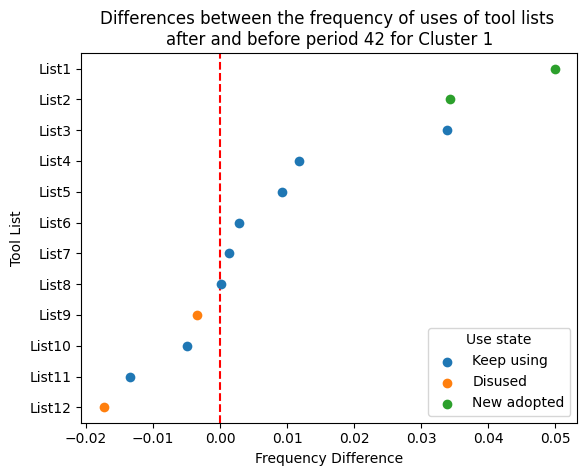

In [ ]:
fig, ax = plt.subplots()
sns.stripplot(data=tool_freq, x='difference', y='index', size=7, hue='use', 
              hue_order=['Keep using', 'Disused', 'New adopted'],ax=ax)
ax.axvline(x=0, **{'linestyle':'--', 'color':'red'})
yticklabels = tool_freq['index'].to_list()
ax.set_yticklabels([f'List{i}' for i in range(1, 13)])
ax.set_ylabel('Tool List')
ax.set_xlabel('Frequency Difference')
ax.legend(title='Use state')
ax.set_title('Differences between the frequency of uses of tool lists \nafter and before period 42 for Cluster 1')
plt.show()

In [ ]:
tool_freq['index'].to_list()

['Tool Container, Browse, Input Data, Join, Filter, Sample, Sort, Insights, Interactive Chart, Render',
 'Comment, Tool Container, Browse, Input Data, Output Data, Text Input, Join, DateTime, Data Cleansing, Formula, Select, Insights',
 'Input Data',
 'Browse, Input Data, Output Data, Action, File Browse, Tab, Data Cleansing, Formula, Select',
 'Comment, Tool Container, Browse, Date Time Now, Text Input, Append Fields, Join, Join Multiple, Union, DateTime, Filter, Formula, Record ID, Sample, Select, Sort, Email, Layout, Report Text, Table, Cross Tab, Summarize, Transpose',
 'Browse',
 'Browse, Input Data',
 'Text Input',
 'Browse, Text Input',
 'Comment, Tool Container, Browse, Date Time Now, Text Input, Append Fields, Join, Join Multiple, Union, DateTime, Data Cleansing, Filter, Formula, Record ID, Sample, Select, Sort, Email, Layout, Report Text, Table, Cross Tab, Summarize, Transpose',
 'Input Data, Output Data',
 'Modeling, Comment, Tool Container, Browse, Input Data, Output Data, 

In [ ]:
df = df.merge(df_tool_lst[['USERID', 'RUN_DATE', 'Period_7']], on=['USERID', 'RUN_DATE'], how='left')

In [ ]:
df3 = df[df['Period_7']<42]
df4 = df[df['Period_7']>=42]

In [ ]:
top10_tc1 = df3['TOOL_CLASS'].value_counts().reset_index(name='freq').head(20)
size = df3.shape[0]
top10_tc1['freq'] = top10_tc1['freq']/size
top10_tc1

,index,freq
0,Preparation,0.273495
1,In/Out,0.171913
2,Join,0.100693
3,Transform,0.074694
4,Documentation,0.072954
5,In-Database,0.067905
6,Reporting,0.061414
7,Interface,0.052646
8,Developer,0.042326
9,Parse,0.038137


In [ ]:
top10_tc2 = df4['TOOL_CLASS'].value_counts().reset_index(name='freq').head(20)
size = df4.shape[0]
top10_tc2['freq'] = top10_tc2['freq']/size
top10_tc2

,index,freq
0,Preparation,0.269292
1,In/Out,0.160128
2,Join,0.099042
3,In-Database,0.085043
4,Transform,0.072667
5,Documentation,0.068908
6,Reporting,0.064400
7,Developer,0.053209
8,Interface,0.051970
9,Parse,0.038228


# Trend modeling

This section is a experimental work. Want to model the trend instead of solely replying on the average trend line.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [ ]:
file_id = '1iEZWSBgzjfpxmIadaY46FyLzvCYA6fS6'
download = drive.CreateFile({'id': file_id})
# Download the file to a local disc
download.GetContentFile('clustering_result.csv')

In [ ]:
file_id = '18iA3lE8laNGa27TyRZcwm-7q-SAcilRB'
download = drive.CreateFile({'id': file_id})
# Download the file to a local disc
download.GetContentFile('df_p7.csv')

In [ ]:
df_ts = pd.read_csv('clustering_result.csv')
df_p7 = pd.read_csv('df_p7.csv')

In [ ]:
df_ts.head(3)

,USERID,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,cluster1_score,cluster2_score,cluster3_score,cluster
0,00080769b607549fe4368730bf28e30d77c6cd58a2d85e...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.000000,0.0,0.0,-101.986271,154.130496,-60.980876,1
1,003a0a5c6d2393bfaa27e53bc5b72b4c890bd3937fa9af...,1.301030,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.000000,0.0,0.0,-95.085655,13.198309,-79.992141,1
2,00abba609eb883eb82f58073d684d8fbc7cae2bf86e79c...,0.845098,0.0,0.0,0.0,0.845098,0.0,0.0,0.0,0.0,...,1.20412,0.477121,0.0,1.079181,0.0,0.0,-75.022664,4.707366,-61.610991,1


In [ ]:
# Unpivot the dataframe
df_ts = pd.melt(df_ts, id_vars=['USERID', 'cluster'], value_vars=[str(i) for i in range(1,62)], var_name='PERIOD', value_name='USER_SCORE')
df_ts['PERIOD'] = df_ts['PERIOD'].astype(int)

In [ ]:
df_ts.sort_values(by=['USERID', 'PERIOD'])

,USERID,cluster,PERIOD,USER_SCORE
0,00080769b607549fe4368730bf28e30d77c6cd58a2d85e...,1,1,0.0
845,00080769b607549fe4368730bf28e30d77c6cd58a2d85e...,1,2,0.0
1690,00080769b607549fe4368730bf28e30d77c6cd58a2d85e...,1,3,0.0
2535,00080769b607549fe4368730bf28e30d77c6cd58a2d85e...,1,4,0.0
3380,00080769b607549fe4368730bf28e30d77c6cd58a2d85e...,1,5,0.0
...,...,...,...,...
48164,ffd546a75b1454e45f280ab7635d9f4432cf57c837fcba...,2,57,0.0
49009,ffd546a75b1454e45f280ab7635d9f4432cf57c837fcba...,2,58,0.0
49854,ffd546a75b1454e45f280ab7635d9f4432cf57c837fcba...,2,59,0.0
50699,ffd546a75b1454e45f280ab7635d9f4432cf57c837fcba...,2,60,0.0


In [ ]:
# Get the X and y to fit the models, we do not split the data into train and test
# sets because we do not do any prediction and we want the model to perfectly fit
# the data
X = df_ts[['PERIOD', 'cluster']]
y = df_ts['USER_SCORE']

## Random Forest

In [ ]:
tune_param = {
    'n_estimators': [110, 115, 120, 125, 130],
    'max_depth': [2, 3, 4, 5, 6]
}

In [ ]:
RF_model = RandomForestRegressor(random_state=170)
gs = GridSearchCV(RF_model, param_grid=tune_param, scoring='neg_mean_squared_error')

In [ ]:
gs.fit(X, y)

GridSearchCV(estimator=RandomForestRegressor(random_state=170),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [110, 115, 120, 125, 130]},
             scoring='neg_mean_squared_error')

In [ ]:
print('Best RF model:', gs.best_estimator_)
print('Best parameters:', gs.best_params_)
print('Best score:', gs.best_score_)

Best RF model: RandomForestRegressor(max_depth=5, n_estimators=115, random_state=170)
Best parameters: {'max_depth': 5, 'n_estimators': 115}
Best score: -0.26032940054829773


In [ ]:
period = np.arange(1, 62)
X_pre = {'PERIOD':np.append(period, [period, period]), 'cluster':[1]*len(period)+[2]*len(period)+[3]*len(period)}
X_pre = pd.DataFrame(X_pre)

In [ ]:
y_pre = gs.predict(X_pre)
X_pre['y_pre'] = y_pre
y_pre.shape

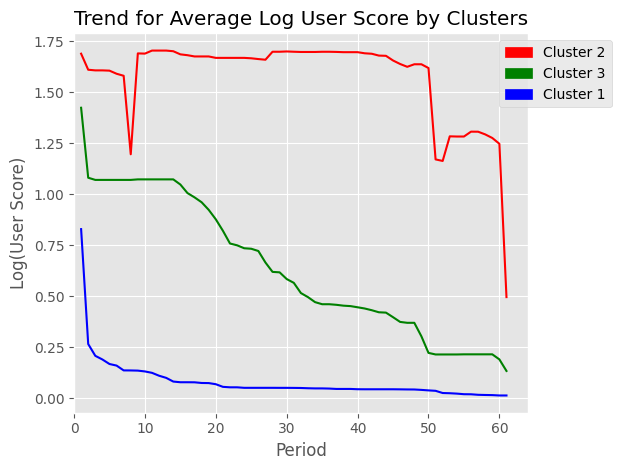

In [ ]:
# Mean Log User score
plt.style.use('ggplot')

X_c1 = X_pre[X_pre['cluster']==1]
plt.plot(X_c1['PERIOD'], X_c1['y_pre'], color='blue')

X_c2 = X_pre[X_pre['cluster']==2]
plt.plot(X_c2['PERIOD'], X_c2['y_pre'], color='red')

X_c3 = X_pre[X_pre['cluster']==3]
plt.plot(X_c3['PERIOD'], X_c3['y_pre'], color='green')

# Creating legend with color box
blue = mpatches.Patch(color='blue', label='Cluster 1')
red = mpatches.Patch(color='red', label='Cluster 2')
green = mpatches.Patch(color='green', label='Cluster 3')
plt.legend(handles=[red, green, blue], loc='upper right', bbox_to_anchor=(1.2, 1),
           frameon=True)

plt.xlim(left=0)
plt.xlabel('Period')
plt.ylabel('Log(User Score)')
plt.title('Trend for Average Log User Score by Clusters')
plt.tight_layout()
#plt.savefig('trend_user_score.png')
plt.show()

## Neural Network

In [ ]:
tune_param = {
    'hidden_layer_sizes':[(16, 8), (32, 16), (64, 32), (32, 16, 8)],
    'activation':['identity', 'tanh', 'relu'],
    'learning_rate_init':[0.0001, 0.001, 0.01]
}

In [ ]:
MLP_model = MLPRegressor(random_state=170)
gs = GridSearchCV(MLP_model, param_grid=tune_param, scoring='neg_mean_squared_error')

In [ ]:
gs.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(estimator=MLPRegressor(random_state=170),
             param_grid={'activation': ['identity', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(16, 8), (32, 16), (64, 32),
                                                (32, 16, 8)],
                         'learning_rate_init': [0.0001, 0.001, 0.01]},
             scoring='neg_mean_squared_error')

In [ ]:
print('Best NN model:', gs.best_estimator_)
print('Best parameters:', gs.best_params_)
print('Best score:', gs.best_score_)

Best NN model: MLPRegressor(hidden_layer_sizes=(16, 8), learning_rate_init=0.0001,
             random_state=170)
Best parameters: {'activation': 'relu', 'hidden_layer_sizes': (16, 8), 'learning_rate_init': 0.0001}
Best score: -0.2649727217777521


In [ ]:
period = np.arange(1, 62)
X_pre = {'PERIOD':np.append(period, [period, period]), 'cluster':[1]*len(period)+[2]*len(period)+[3]*len(period)}
X_pre = pd.DataFrame(X_pre)

In [ ]:
y_pre = gs.predict(X_pre)
X_pre['y_pre'] = y_pre
y_pre.shape

(183,)

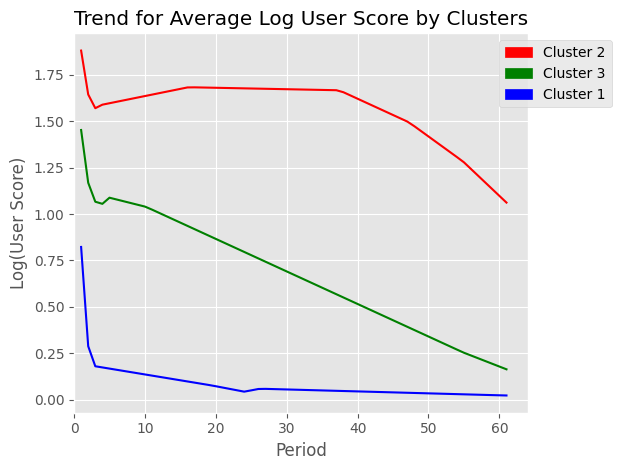

In [ ]:
# Mean Log User score
plt.style.use('ggplot')

X_c1 = X_pre[X_pre['cluster']==1]
plt.plot(X_c1['PERIOD'], X_c1['y_pre'], color='blue')

X_c2 = X_pre[X_pre['cluster']==2]
plt.plot(X_c2['PERIOD'], X_c2['y_pre'], color='red')

X_c3 = X_pre[X_pre['cluster']==3]
plt.plot(X_c3['PERIOD'], X_c3['y_pre'], color='green')

# Creating legend with color box
blue = mpatches.Patch(color='blue', label='Cluster 1')
red = mpatches.Patch(color='red', label='Cluster 2')
green = mpatches.Patch(color='green', label='Cluster 3')
plt.legend(handles=[red, green, blue], loc='upper right', bbox_to_anchor=(1.2, 1),
           frameon=True)

plt.xlim(left=0)
plt.xlabel('Period')
plt.ylabel('Log(User Score)')
plt.title('Trend for Average Log User Score by Clusters')
plt.tight_layout()
#plt.savefig('trend_user_score.png')
plt.show()